# A. Mise en place de l'environnement

## > Import des modules

In [1]:
import spacy  # Pour le traitement du langage naturel

# Téléchargement dans l'environnement virtuel du modèle  de langue anglaise s'il est absent
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 1. Traitement et analyse de données
import pandas as pd
import numpy as np

# 2. Deep Learning et Machine Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
import tensorflow as tf
import tensorflow_hub as hub
from torch.utils.data import Dataset, DataLoader, TensorDataset

# 3. Scikit-learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.mixture import GaussianMixture

# 4. Visualisation de données
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Traitement du langage naturel (NLP)
from transformers import BertTokenizer, BertForSequenceClassification, BertModel, AutoTokenizer, AutoModel
import spacy
import en_core_web_trf
from spacy.tokens import Doc

# 6. Statistiques et probabilités
from scipy.stats import randint, uniform, chi2_contingency

# 7. Traitement d'images
import cv2
from PIL import Image

# 8. Réduction de dimensionnalité et clustering
import umap.umap_ as umap
import hdbscan

# 9. Utilitaires
import random
from tqdm import tqdm
import os
from typing import Union
import urllib
import shutil

# Chargement des modèles pré-entraînés
glove_file = './Modeles/glove.6B.50d.txt'

# Créer un dictionnaire pour stocker les embeddings
gloVe_dict = {}

# Ouvrir le fichier GloVe et lire les vecteurs
with open(glove_file, 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        gloVe_dict[word] = vector

# Vider le cache de TensorFlow Hub
os.environ['TFHUB_CACHE_DIR'] = './tfhub_cache'
if os.path.exists('./tfhub_cache'):
    shutil.rmtree('./tfhub_cache')

# Charger le modèle Universal Sentence Encoder

modele_use = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4")


In [3]:
# Test de la tokenisation avec Spacy
doc = nlp("This is a sentence. What's up ?")

[token.text for token in doc]

['This', 'is', 'a', 'sentence', '.', 'What', "'s", 'up', '?']

In [4]:
# Test de la tokenisation avec Spacy
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT'), ('What', 'PRON'), ("'s", 'AUX'), ('up', 'ADV'), ('?', 'PUNCT')]


In [5]:
# Test de la tokenisation avec Spacy
[token.text for token in doc if not token.is_punct]

['This', 'is', 'a', 'sentence', 'What', "'s", 'up']

In [6]:
# Graine pour la reproductibilité
graine = 242

In [7]:
# Définition de la fonction case_when
def case_when(*args):
    """Fonction pour simuler la fonction CASE WHEN de SQL."""
    if len(args) % 2 != 0:
        raise ValueError("Le nombre d'arguments doit être pair (paires de conditions et de valeurs).")

    condlist = [args[i] for i in range(0, len(args), 2)]
    choicelist = [args[i] for i in range(1, len(args), 2)]

    return np.select(condlist, choicelist, default=pd.NA)

## > Import des données

In [8]:
# Lecture des données textuelles
texte = pd.read_csv('./Data/flipkart_com-ecommerce_sample_1050.csv')
texte.sample(5, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,Key Features of florence9 baby cap red checks ...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,Key Features of Toddla Baby Girl's Gathered Dr...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""..."
974,b0229d4466ac60c7ba53c7ce9fabad7c,2016-06-14 18:49:44 +0000,http://www.flipkart.com/jaycoknit-mediterranea...,Jaycoknit Mediterranean Sea's Lucky Wooden Han...,"[""Home Decor & Festive Needs >> Religion & Dev...",SHIEJNH8TTK9QJPJ,1799.0,399.0,b0229d4466ac60c7ba53c7ce9fabad7c.jpg,False,Key Features of Jaycoknit Mediterranean Sea's ...,No rating available,No rating available,Jaycoknit,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
523,8d1abb3504a19ab41e7d8b8b1d5dd839,2016-01-07 05:50:25 +0000,http://www.flipkart.com/maxima-09321cmgy-gold-...,Maxima 09321CMGY Gold Analog Watch - For Men,"[""Watches >> Wrist Watches >> Maxima Wrist Wat...",WATDZ5HGZZCZXDNC,975.0,880.0,8d1abb3504a19ab41e7d8b8b1d5dd839.jpg,False,Maxima 09321CMGY Gold Analog Watch - For Men ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."


# B. Texte

## I - Tokenisation

In [9]:
# Récupération des stopwords de Spacy
stop_words = set(nlp.Defaults.stop_words)

# Tokenisation des textes
def tokenize_text(text: Union[str, Doc]) -> list[str]:
    """
    Cette fonction prend un texte ou un objet Doc spaCy en entrée et renvoie une liste de lemmes.
    Les lemmes sont les formes canoniques des mots, obtenues après traitement par Spacy.
    Les ponctuations et les stopwords sont supprimés.

    Parameters
    ----------
    text : Union[str, spacy.tokens.Doc]
        Le texte ou le document spaCy à tokenizer.

    Returns
    -------
    List[str]
        La liste de lemmes du texte en entrée.
    """
    if isinstance(text, str):
        doc = nlp(text)
    elif isinstance(text, Doc):
        doc = text
    else:
        raise TypeError("L'entrée doit être une chaîne de caractères ou un objet spacy.tokens.Doc")
    
    return [token.lemma_ for token in doc if not (token.is_punct or token.lemma_ in stop_words)]

def process_batch(texts: list[str]) -> list[list[str]]:
    docs = list(nlp.pipe(texts))  # Process texts in a batch
    return [tokenize_text(doc) for doc in tqdm(docs, desc="Processing texts")] 

def tokenize_corpus(dataframe: pd.DataFrame, colonne: str, batch_size: int = 1000) -> pd.DataFrame:
    """
    Cette fonction prend un DataFrame et le nom d'une colonne en entrée,
    et renvoie un nouveau DataFrame avec une colonne supplémentaire contenant les listes de lemmes.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Le DataFrame à tokenizer.
    colonne : str
        Le nom de la colonne contenant les textes à tokenizer.
    batch_size : int, optional
        La taille des lots pour le traitement par lots (par défaut 1000).

    Returns
    -------
    pd.DataFrame
        Le DataFrame avec une colonne supplémentaire contenant les listes de lemmes.
        La nouvelle colonne a pour nom '{colonne} token'.
    """
    df = dataframe.copy()
    
    # Traitement par lots avec tqdm pour le suivi de progression
    tokens = []
    total_batches = (len(df) + batch_size - 1) // batch_size  # Calcul du nombre total de lots
    for i in tqdm(range(0, len(df), batch_size), total=total_batches, desc="Tokenizing batches"):
        batch = df[colonne].iloc[i:i+batch_size].tolist()
        tokens.extend(process_batch(batch))
    
    df[colonne+' token'] = tokens
    df[colonne+' token raw'] = df[colonne+' token'].apply(' '.join)
    
    return df

In [10]:
# Test de la fonction de tokenization sur un texte dummy. En particulier, présence de plusieurs variantes d'un même lemme ("like" et "liking")
tokenize_text("Hey, what's up ? I like pasta quite much actually, but I do prefer a nice bowl of rice ! Recently, I've taken a liking to surfing and playing basketball. I have two basketballs at home to play with my wife and kids. She took of last night with the children, they went to Paris.")

['hey',
 'I',
 'like',
 'pasta',
 'actually',
 'I',
 'prefer',
 'nice',
 'bowl',
 'rice',
 'recently',
 'I',
 'liking',
 'surf',
 'play',
 'basketball',
 'I',
 'basketball',
 'home',
 'play',
 'wife',
 'kid',
 'night',
 'child',
 'Paris']

In [11]:
# Nombre de documents (descriptions) composants le corpus
len(texte)

1050

In [12]:
# Visualisation de quelque documents du corpus
i = 1
for text in texte['description'].sample(10, random_state=graine):
    print('Extrait n°'+str(i))
    print(text + '\n')
    i += 1

Extrait n°1
Key Features of florence9 baby cap red checks Cap red checks Cotton,Specifications of florence9 baby cap red checks Cap Cap Details Number of Contents in Sales Package Pack of 1 Fabric Cotton Type baby cap red checks General Details Occasion Casual Ideal For Baby Boy's, Baby Girl's Additional Details Style Code baby cap red checks

Extrait n°2
Key Features of Toddla Baby Girl's Gathered Dress Raglan printed dress with beautiful flower on waist. Lining 100% cotton. Toddla Gathered A-Line Cotton Floral Print Knee-LongDress For Baby Girls Material : Made up of  Cotton that make this dress very comfortable to wear all day long . The perfrect dress for little princess to carry her cuteness and style . wash Care : Normal Wash in Cold Water . Do Not Twist . Do not Tumble .Dry in Shade .,Toddla Baby Girl's Gathered Dress Price: Rs. 499 Raglan printed dress with beautiful flower on waist. Lining 100% cotton.,Specifications of Toddla Baby Girl's Gathered Dress In The Box 1 Frock Dime

In [13]:
# Tokenization du corpus
texte = tokenize_corpus(dataframe=texte, colonne='description')
# Temps d'exécution Google Colab ~12mn -> le temps de prendre un café

Tokenizing batches: 100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


In [14]:
texte['description token'].sample(5, random_state=graine)

79     [Key, Features, florence9, baby, cap, red, che...
292    [Key, Features, Toddla, Baby, Girl, Gathered, ...
974    [Key, Features, Jaycoknit, Mediterranean, Sea,...
3      [Key, feature, santosh, ROYAL, FASHION, Cotton...
523    [Maxima, 09321cmgy, Gold, Analog, Watch,  , Me...
Name: description token, dtype: object

In [15]:
# Visualisation du corpus
texte.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,Key Features of florence9 baby cap red checks ...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[Key, Features, florence9, baby, cap, red, che...",Key Features florence9 baby cap red check cap ...
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,Key Features of Toddla Baby Girl's Gathered Dr...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Key, Features, Toddla, Baby, Girl, Gathered, ...",Key Features Toddla Baby Girl Gathered Dress R...


### Bag of Word, TfIdf

#### BoW

In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texte['description token raw'])
feature_names = vectorizer.get_feature_names_out()
bow_matrix = X.toarray()

In [17]:
bow_matrix.shape
# 1050 documents dans le corpus, vocabulaire de 5318 mots distincts

(1050, 5477)

In [18]:
# Matrice bow
bow_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
bow_matrix.mean()
# Très creuse

0.00995400679899493

#### TF-IDF

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texte['description token raw'])
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()

In [21]:
tfidf_matrix.shape
# Renvoie le nombre de document + la taille du vocabulaire du corpus tokenisé

(1050, 5477)

In [22]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf_matrix.mean()
# Également très creuse

0.00080721780873595

In [24]:
# Aplatir la liste de jetons pour créer une liste python contenant tous les documents
# Mis bout à bout
vocabulaire = [jeton for sous_liste in texte['description token'] for jeton in sous_liste]

# Vectoriser les jetons
vectoriseur = CountVectorizer()
sac_de_mots = vectoriseur.fit_transform(vocabulaire)
sac_de_mots

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 57240 stored elements and shape (60356, 5477)>

In [25]:
len(vocabulaire)

60356

#### Fréquence BoW

In [26]:
def tracer_mots_les_plus_frequents(jetons_serie, n_mots_les_plus_frequents=10, desc=True):
    """
    Trace un graphique à barres des mots les plus fréquents dans une série de jetons.

    Paramètres
    ----------
    jetons_serie : pandas.Series
        Série de jetons (ou colonne de jetons dans un dataframe pandas).
    n_mots_les_plus_frequents : int, facultatif
        Nombre de mots les plus fréquents à tracer (par défaut : 10).

    Retours
    -------
    None

    Exemples
    --------
    >>> tracer_mots_les_plus_frequents(texte['description jeton'], n_mots_les_plus_frequents=10)
    """
    # Aplatir la liste de jetons
    vocabulaire = [jeton for sous_liste in jetons_serie for jeton in sous_liste]

    # Vectoriser les jetons
    vectoriseur = CountVectorizer()
    sac_de_mots = vectoriseur.fit_transform(vocabulaire)

    # Extraire les fréquences des mots
    freq_mots = sac_de_mots.sum(axis=0)

    # Trier les mots par fréquence
    vocabulaire_trie = sorted(vectoriseur.vocabulary_, key=lambda x: freq_mots[0, vectoriseur.vocabulary_[x]], reverse=desc)

    # Sélectionner les N mots les plus fréquents
    plus_frequents = vocabulaire_trie[:n_mots_les_plus_frequents]

    # Extraire les fréquences des N mots les plus fréquents
    freqs = [freq_mots[0, vectoriseur.vocabulary_[mot]] for mot in plus_frequents]

    # Tracer les mots les plus fréquents
    plt.figure(figsize=(10, 5))
    plt.bar(plus_frequents, freqs)
    plt.title('Top {} mots les plus fréquents'.format(n_mots_les_plus_frequents))
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Réduction taille de vocabulaire :
# Retirer mots très fréquents qui portent pas forcément bcp de sens et/ou ceux qui sont trop peu fréquents et font du bruit stat pour les modèles

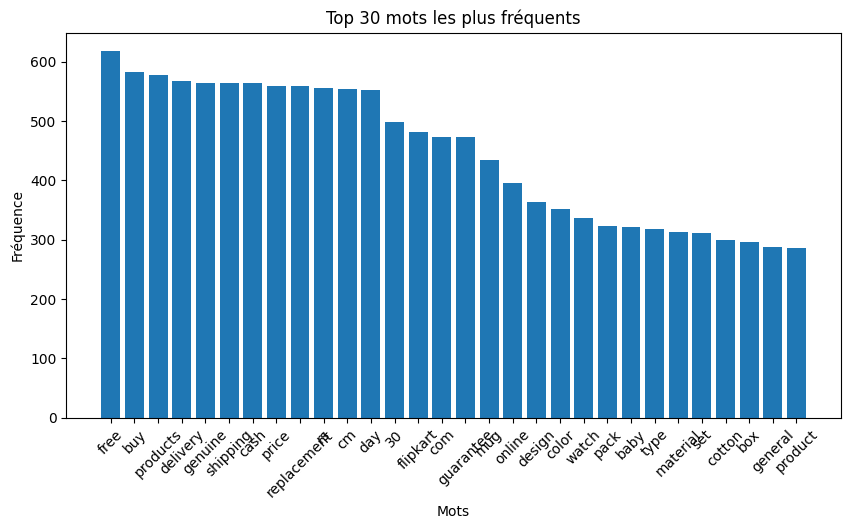

In [28]:
tracer_mots_les_plus_frequents(texte['description token'], 30,desc=True)

#### Fréquence TF-IDF

In [29]:
def tracer_mots_les_plus_importants_tfidf(jetons_serie, n_mots_les_plus_importants=10):
    """
    Trace un graphique à barres des mots les plus importants en utilisant TF-IDF dans une série de jetons.

    Paramètres
    ----------
    jetons_serie : pandas.Series
        Série de jetons (ou colonne de jetons dans un dataframe pandas).
    n_mots_les_plus_importants : int, facultatif
        Nombre de mots les plus importants à tracer (par défaut : 10).

    Retours
    -------
    None

    Exemples
    --------
    >>> tracer_mots_les_plus_importants_tfidf(texte['description jeton'], n_mots_les_plus_importants=10)
    """
    # Joindre les listes de jetons en une seule chaîne de caractères par document
    vocabulaire = [' '.join(jetons) for jetons in jetons_serie]

    # Vectoriser les jetons en utilisant TF-IDF
    vectoriseur = TfidfVectorizer()
    tfidf_matrix = vectoriseur.fit_transform(vocabulaire)

    # Extraire les scores TF-IDF moyens pour chaque terme
    tfidf_scores = tfidf_matrix.mean(axis=0).A1

    # Créer un DataFrame avec les termes et leurs scores TF-IDF
    termes = vectoriseur.get_feature_names_out()
    tfidf_df = pd.DataFrame({'terme': termes, 'tfidf': tfidf_scores})

    # Trier les termes par score TF-IDF
    tfidf_df = tfidf_df.sort_values(by='tfidf', ascending=False)

    # Sélectionner les N termes les plus importants
    top_termes = tfidf_df.head(n_mots_les_plus_importants)

    # Tracer les termes les plus importants
    plt.figure(figsize=(10, 5))
    plt.bar(top_termes['terme'], top_termes['tfidf'])
    plt.title('Top {} termes les plus importants (TF-IDF)'.format(n_mots_les_plus_importants))
    plt.xlabel('Termes')
    plt.ylabel('Score TF-IDF')
    plt.xticks(rotation=45)
    plt.show()

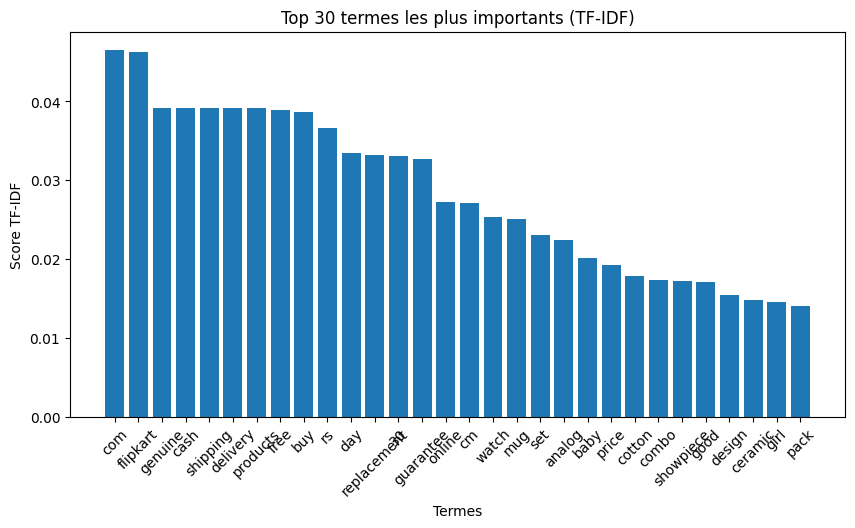

In [30]:
tracer_mots_les_plus_importants_tfidf(texte['description token'], n_mots_les_plus_importants=30)

In [31]:
# Distribution du nombre de token dans le corpus

(texte['description token'].apply(len)).describe()

count    1050.000000
mean       57.481905
std        50.394763
min        14.000000
25%        25.000000
50%        37.000000
75%        74.000000
max       358.000000
Name: description token, dtype: float64

### Nettoyage de token superflus

In [32]:
def delete_token_str(dataframe: pd.DataFrame, colonne: str, token: str):
    df = dataframe.copy()
    df[colonne] = df[colonne].str.replace(token, '', case=False, regex=True)
    return df

def delete_list_token_str(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  for token in list_token:
    df = delete_token_str(df, colonne, token)
  return df

def delete_token_vect(dataframe:pd.DataFrame, colonne:str, token:str):
  df = dataframe.copy()
  df[colonne] = df[colonne].apply(lambda x: [jeton for jeton in x if jeton.lower() != token.lower()])
  return df

def delete_list_token_vect(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  for token in list_token:
    df = delete_token_vect(df, colonne, token)
  return df

def delete_list_token(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  df = delete_list_token_str(df, colonne+' token raw', list_token)
  df = delete_list_token_vect(df, colonne+' token', list_token)
  return df

In [33]:
df_test = pd.DataFrame({
    'text': [
        'Hello, how are you today?',
        'I am doing well, thank you.',
        'This is an example.',
        'Add more lines.',
        'As many as you want.',
        'Oops, I made a mistake.',
        'This is another line.',
        'Oops, I did it again!',
        'More and more lines.',
        'Keep adding them.',
        'Oops, I cannot stop!',
        'Almost there.',
        'Just a few more.',
        'Oops, this is fun!',
        'Finally, fifteen lines.'
    ]
})

df_test = tokenize_corpus(df_test, 'text')
df_test

Tokenizing batches: 100%|██████████| 1/1 [00:00<00:00, 70.64it/s]


,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,"Oops, I made a mistake.","[oop, I, mistake]",oop I mistake
6,This is another line.,[line],line
7,"Oops, I did it again!","[oop, I]",oop I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [34]:
delete_token_str(df_test, 'text', 'oops')

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,", I made a mistake.","[oop, I, mistake]",oop I mistake
6,This is another line.,[line],line
7,", I did it again!","[oop, I]",oop I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [35]:
delete_token_vect(df_test, 'text token', 'Oops')

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,"Oops, I made a mistake.","[oop, I, mistake]",oop I mistake
6,This is another line.,[line],line
7,"Oops, I did it again!","[oop, I]",oop I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [36]:
delete_list_token_str(df_test, 'text', ['Oops', 'I'])

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"am dong well, thank you.","[I, thank]",I thank
2,Ths s an example.,[example],example
3,Add more lnes.,"[add, line]",add line
4,As many as you want.,[want],want
5,", made a mstake.","[oop, I, mistake]",oop I mistake
6,Ths s another lne.,[line],line
7,", dd t agan!","[oop, I]",oop I
8,More and more lnes.,"[More, line]",More line
9,Keep addng them.,[add],add


In [37]:
delete_list_token(df_test, 'text', ['Oops'])

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,"Oops, I made a mistake.","[oop, I, mistake]",oop I mistake
6,This is another line.,[line],line
7,"Oops, I did it again!","[oop, I]",oop I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [38]:
len(texte[texte['description token raw'].str.contains('key')])

5

In [39]:
texte.loc[texte['description token raw'].str.contains('key'),'description token raw']

51     Key Features roq Slim Multimedia 105key flexib...
80     Key Features VarEesha Wooden Key Holder Hand u...
423    Key Features YGS Keyboard Case Asus Memo Pad 7...
589    Shopfloor XYZ Vacuum Cleaner Computers Laptops...
857    99gem Smart OTG Connection kit usb usb Cable B...
Name: description token raw, dtype: object

In [40]:
len(texte[texte['description token raw'].str.contains('com')])

534

In [41]:
for text in texte.loc[texte['description token raw'].str.contains('com'),'description token'].sample(10, random_state=graine):
  print(text,'\n')

['Maxima', '24742LMGY', 'Gold', 'Analog', 'Watch', ' ', 'Men', 'Buy', 'Maxima', '24742LMGY', 'Gold', 'Analog', 'Watch', ' ', 'men', ' ', '24742LMGY', 'Online', 'Rs.950', 'India', 'Flipkart.com', 'Black', 'Strap', 'Water', 'Resistant', 'Round', 'Dial', 'Great', 'Discounts', 'Genuine', 'Products', '30', 'Day', 'Replacement', 'Guarantee', 'Free', 'shipping', 'Cash', 'Delivery'] 

['Romex', 'Ultimate', 'Urban', 'Analog', 'Watch', ' ', 'Boys', 'Men', '\r\n                         ', 'price', 'r', '499', '\r\n\t\t\t\t\r\n\t\t\t', 'present', 'classic', 'fabulous', 'satin', 'color', 'watch', 'man', 'House', 'Romex', 'watch', 'offer', 'priceless', 'look', 'class', 'want', 'adorn', 'black', 'coloured', 'strap', 'silicon', 'material', 'watch', 'offer', 'true', 'craftsmanship', 'people', 'distinct', 'taste', 'identify', 'watch', 'design', 'use', 'technology', 'innovation', 'wrap', 'round', 'silver', 'dial', 'encase', 'sand', 'blast', 'case', 'beautifully', 'place', 'wrist', 'use', 'comfortable', '

#### Selection des banwords

In [42]:
corpus_ajuste = delete_list_token(texte, 'description', ['flipkart',
                                                         'com',
                                                         'flipkart.com',
                                                         'key',
                                                         'feature',
                                                         'buy',
                                                         'shipping',
                                                         'delivery',
                                                         'genuine',
                                                         '\r\n',
                                                         '\r\n\r\n',
                                                         '\t'])

In [43]:
corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Features, Elegance, Polyester, Multicolor, Ab...",s Elegance Polyester Multicolor Abstract Eyel...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, Cotton, Bath, Towel,...",specification Sathiyas Cotton Bath Towel 3 Bat...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Features, Eurospa, Cotton, Terry, Face, Towel...",s Eurospa Cotton Terry Face Towel Set Size sm...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[santosh, ROYAL, FASHION, Cotton, Printed, Kin...",santosh ROYAL FASHION Cotton Printed King si...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, Print, Cotton, Floral, King, size, Do...",Jaipur Print Cotton Floral King size Double ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, extra, large, Self, Adhesive, ...",Oren Empower extra large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of .

In [44]:
corpus_ajuste.loc[corpus_ajuste['description'].str.contains('flipkart'),'description']

735    Key Features of AntiqueShop ABKL_GRN_GRN_GRN S...
736    Key Features of AntiqueShop ABKL_PL_PNK_PNK So...
737    Key Features of AntiqueShop ABKL_PL_PL_PNK Sof...
994    Key Features of AM Creation Magic  Ceramic Mug...
Name: description, dtype: object

In [45]:
def delete_list_token_str(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  for token in list_token:
    df[colonne] = df[colonne].apply(lambda x: ' '.join([mot for mot in x.split() if mot.lower() not in token]))
  return df

# Liste de mots à supprimer
mots_a_supprimer = ['flipkart', 'com', 'flipkart.com', 'key', 'feature', 'buy', 'shipping', 'delivery', 'genuine', '\r\n', '\r\n\r\n', '\t']

# Supprimer les mots de la colonne 'description'
corpus_ajuste = delete_list_token_str(corpus_ajuste, 'description', mots_a_supprimer)

# Afficher le corpus ajusté
corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Features of Elegance Polyester Multicolor Abst...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Features, Elegance, Polyester, Multicolor, Ab...",s Elegance Polyester Multicolor Abstract Eyel...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, Cotton, Bath, Towel,...",specification Sathiyas Cotton Bath Towel 3 Bat...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Features of Eurospa Cotton Terry Face Towel Se...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Features, Eurospa, Cotton, Terry, Face, Towel...",s Eurospa Cotton Terry Face Towel Set Size sm...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Features of SANTOSH ROYAL FASHION Cotton Print...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[santosh, ROYAL, FASHION, Cotton, Printed, Kin...",santosh ROYAL FASHION Cotton Printed King si...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Features of Jaipur Print Cotton Floral King si...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, Print, Cotton, Floral, King, size, Do...",Jaipur Print Cotton Floral King size Double ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, extra, large, Self, Adhesive, ...",Oren Empower extra large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of .

In [46]:
corpus_ajuste.loc[corpus_ajuste['description'].str.contains('flipkart'),'description']

Series([], Name: description, dtype: object)

### Nouveau tfidf

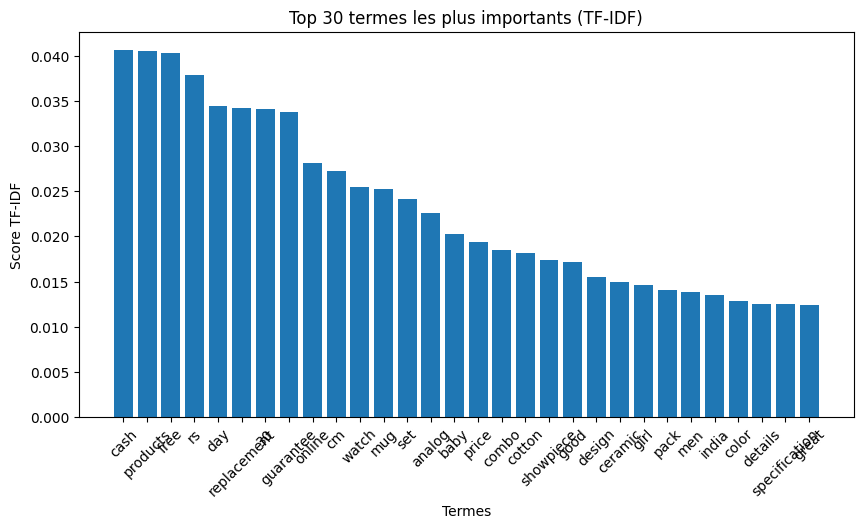

In [47]:
tracer_mots_les_plus_importants_tfidf(corpus_ajuste['description token'], n_mots_les_plus_importants=30)

In [48]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_ajuste['description token raw'])
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()

In [49]:
feature_names

array(['00', '000', '001', ..., 'zoom', 'zora', 'zyxel'], dtype=object)

## II - Classification

### Simplification des classes intrinsèques

In [50]:
corpus_ajuste['simple_product_category_tree'] = corpus_ajuste['product_category_tree'].apply(lambda x: x.split(' >> ')[0] if isinstance(x, str) else x)
# Use a regular expression to replace '[' and '"' characters
corpus_ajuste['simple_product_category_tree'] = corpus_ajuste['simple_product_category_tree'].str.replace(r'[\["]', '', regex=True)


In [51]:
corpus_ajuste['simple_product_category_tree'].value_counts()

simple_product_category_tree
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [52]:
corpus_ajuste['simple_product_category_tree'].nunique()

7

### LDA

In [53]:
# LDA pour la classification

n_cat = 7

lda = LatentDirichletAllocation(n_components=n_cat, random_state=graine)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=7, random_state=242)

In [54]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx+1))
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1] if i < len(feature_names)]) # Added a condition to check if the index is within the bounds of feature_names
        print(" ") # Added an empty print statement to add a space after each topic

no_top_words = 10
display_topics(lda, feature_names, no_top_words)

Topic 1:
['rockmantra', 'mug', 'ceramic', 'day', 'craft', 'ensure', 'creation', 'thrilling', 'porcelain', 'permanent']
 
Topic 2:
['laptop', 'skin', 'usb', 'warranty', 'shapes', 'product', 'print', 'mouse', 'pad', 'hub']
 
Topic 3:
['towel', 'mug', 'bath', 'cash', 'products', 'free', 'design', 'bottle', 'adapter', 'rs']
 
Topic 4:
['baby', 'products', 'cash', 'cotton', 'free', 'rs', 'set', 'cm', 'girl', 'details']
 
Topic 5:
['watch', 'analog', 'men', 'online', '30', 'replacement', 'india', 'guarantee', 'showpiece', 'day']
 
Topic 6:
['curtain', 'eyelet', 'pizza', 'polyester', 'free', 'cash', 'door', 'products', 'cutter', 'guarantee']
 
Topic 7:
['coffee', 'mug', 'cell', 'battery', 'laptop', 'hp', 'tea', 'pavilion', 'printland', 'replacement']
 


In [55]:
document_topics = lda.transform(tfidf_matrix)

corpus_ajuste['LDA_label'] = document_topics.argmax(axis=1)

corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Features of Elegance Polyester Multicolor Abst...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Features, Elegance, Polyester, Multicolor, Ab...",s Elegance Polyester Multicolor Abstract Eyel...,Home Furnishing,3
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, Cotton, Bath, Towel,...",specification Sathiyas Cotton Bath Towel 3 Bat...,Baby Care,3
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Features of Eurospa Cotton Terry Face Towel Se...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Features, Eurospa, Cotton, Terry, Face, Towel...",s Eurospa Cotton Terry Face Towel Set Size sm...,Baby Care,3
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Features of SANTOSH ROYAL FASHION Cotton Print...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[santosh, ROYAL, FASHION, Cotton, Printed, Kin...",santosh ROYAL FASHION Cotton Printed King si...,Home Furnishing,3
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Features of Jaipur Print Cotton Floral King si...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, Print, Cotton, Floral, King, size, Do...",Jaipur Print Cotton Floral King size Double ...,Home Furnishing,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, extra, large, Self, Adhesive, ...",Oren Empower extra large Self Adhesive Sticker...,Baby Care,3
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large 

In [56]:
adjusted_rand_score(corpus_ajuste['LDA_label'], corpus_ajuste['simple_product_category_tree'])

0.1242078647747044

In [57]:
 # gensim peut permettre d'enrichir les token par des ngrams pertinents
 # aussi regarder côté transformers huggingface

### NMF

In [58]:
#NMF

n_topics = 7 #Peut être essayer d'augmenter le nb de topics

nmf = NMF(n_components=n_topics, random_state=graine,l1_ratio=.5)
nmf.fit(tfidf_matrix)

NMF(l1_ratio=0.5, n_components=7, random_state=242)

In [59]:
display_topics(nmf, feature_names, no_top_words)

Topic 1:
['guarantee', '30', 'replacement', 'day', 'cash', 'products', 'free', 'bo', 'set', 'rs']
 
Topic 2:
['rockmantra', 'ceramic', 'mug', 'porcelain', 'permanent', 'thrilling', 'too', 'stay', 'start', 'creation']
 
Topic 3:
['baby', 'details', 'girl', 'fabric', 'cotton', 'dress', 'boy', 'sleeve', 'neck', 'shirt']
 
Topic 4:
['watch', 'analog', 'men', 'discounts', 'india', 'great', 'dial', 'maxima', 'strap', 'women']
 
Topic 5:
['mug', 'coffee', 'ceramic', 'perfect', 'tea', 'printland', 'prithish', 'love', 'gift', 'bring']
 
Topic 6:
['cm', 'showpiece', 'inch', 'cover', 'laptop', 'design', 'warranty', 'skin', 'pack', 'model']
 
Topic 7:
['abstract', 'blanket', 'single', 'double', 'rs', 'cash', 'products', 'free', 'quilts', 'forters']
 


In [60]:
document_topics = nmf.transform(tfidf_matrix)

corpus_ajuste['NMF_label'] = document_topics.argmax(axis=1)

corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Features of Elegance Polyester Multicolor Abst...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Features, Elegance, Polyester, Multicolor, Ab...",s Elegance Polyester Multicolor Abstract Eyel...,Home Furnishing,3,5
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, Cotton, Bath, Towel,...",specification Sathiyas Cotton Bath Towel 3 Bat...,Baby Care,3,5
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Features of Eurospa Cotton Terry Face Towel Se...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Features, Eurospa, Cotton, Terry, Face, Towel...",s Eurospa Cotton Terry Face Towel Set Size sm...,Baby Care,3,5
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Features of SANTOSH ROYAL FASHION Cotton Print...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[santosh, ROYAL, FASHION, Cotton, Printed, Kin...",santosh ROYAL FASHION Cotton Printed King si...,Home Furnishing,3,5
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Features of Jaipur Print Cotton Floral King si...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, Print, Cotton, Floral, King, size, Do...",Jaipur Print Cotton Floral King size Double ...,Home Furnishing,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, extra, large, Self, Adhesive, ...",Oren Empower extra large Self Adhesive Sticker...,Baby Care,3,5
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.j

In [61]:
adjusted_rand_score(corpus_ajuste['NMF_label'], corpus_ajuste['simple_product_category_tree'])

0.34156133438712855

In [62]:
# Construire la table de contingence
contingency_table = pd.crosstab(corpus_ajuste['NMF_label'], corpus_ajuste['simple_product_category_tree'])

# Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Chi2 statistique: ", chi2)
print("p-value: ", p)
print("Degrés de liberté: ", dof)
#print("Tableau des fréquences attendues: \n", expected)

# Interpréter les résultats
alpha = 0.05
if p < alpha:
    print(f"On rejette l'hypothèse nulle d'indépendance entre le label et la catégorie de produit à un risque {round(100*alpha)} %.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle d'indépendance entre le label et la catégorie de produit.")


Chi2 statistique:  2750.8407092545626
p-value:  0.0
Degrés de liberté:  36
On rejette l'hypothèse nulle d'indépendance entre le label et la catégorie de produit à un risque 5 %.


In [63]:
crosstab = pd.crosstab(corpus_ajuste['NMF_label'], corpus_ajuste['simple_product_category_tree'])
crosstab

simple_product_category_tree,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
NMF_label,,,,,,,
0,17,108,93,13,1,32,0
1,0,0,0,0,0,21,0
2,91,0,0,0,4,0,0
3,1,1,0,0,0,0,149
4,2,0,0,0,0,54,0
5,23,41,57,135,60,42,1
6,16,0,0,2,85,1,0


In [64]:
crosstab['total'] = crosstab.sum(axis=1) # Calculates the sum of each row and adds it as a new column named 'total'
crosstab

simple_product_category_tree,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches,total
NMF_label,,,,,,,,
0,17,108,93,13,1,32,0,264
1,0,0,0,0,0,21,0,21
2,91,0,0,0,4,0,0,95
3,1,1,0,0,0,0,149,151
4,2,0,0,0,0,54,0,56
5,23,41,57,135,60,42,1,359
6,16,0,0,2,85,1,0,104


In [65]:
corpus_ajuste['product_category_tree'].value_counts()

product_category_tree
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1

## III - Embedding

### Définitions des méthodes d'embedding de documents

In [66]:
def create_gloVe_embeddings(dataframe: pd.DataFrame, colonne: str, model: dict, embedding_dim: int = 50) -> pd.DataFrame:
    """
    Crée une colonne supplémentaire contenant des embeddings GloVe pour chaque document dans un DataFrame.
    
    Args:
        dataframe: Le DataFrame contenant les documents.
        colonne: Le nom de la colonne contenant les listes de tokens.
        model: Le dictionnaire d'embeddings GloVe.
        embedding_dim: La dimension des embeddings (par défaut 50).

    Returns:
        Le DataFrame avec une nouvelle colonne contenant les embeddings GloVe.
    """
    df = dataframe.copy()
    embeddings = []
    for liste_tokens in df[colonne]:
        document_embedding = np.zeros(embedding_dim)
        for token in liste_tokens:
            if token in model:
                document_embedding += model[token]
        embeddings.append(document_embedding)
    df['gloVe_embeddings'] = embeddings
    return df

def create_BERT_embeddings(dataframe: pd.DataFrame, colonne_texte: str, nom_modele='bert-base-cased', utiliser_gpu=True) -> pd.DataFrame:
    """
    Crée deux colonnes supplémentaires contenant des embeddings BERT pour chaque document dans un DataFrame :
    - 'bert_embeddings_cls' : Embeddings du token [CLS].

    Args:
        dataframe: Le DataFrame contenant les documents.
        colonne_texte: Le nom de la colonne contenant les textes à encoder.
        nom_modele: Le nom du modèle BERT pré-entraîné à utiliser (par défaut : 'bert-base-cased').
        utiliser_gpu: Booléen indiquant si le calcul doit être effectué sur GPU (si disponible).

    Returns:
        Le DataFrame avec deux nouvelles colonnes contenant les embeddings BERT.
    """

    df_copie = dataframe.copy()
    tokenizer = AutoTokenizer.from_pretrained(nom_modele)
    modele = AutoModel.from_pretrained(nom_modele)

    if utiliser_gpu and torch.cuda.is_available():
        device = torch.device('cuda')
        modele.to(device)
    else:
        device = torch.device('cpu')

    liste_embeddings_cls = []

    for texte in df_copie[colonne_texte]:
        inputs = tokenizer(texte, return_tensors="pt", padding=True, truncation=True)
        # Padding pour atteindre la longueur attendue par le modele, truncation quand c'est trop long
        inputs.to(device)
        with torch.no_grad():
          outputs = modele(**inputs)

        # Extraction de l'embedding du token [CLS]
        embedding_cls = outputs.last_hidden_state[:, 0, :].cpu().squeeze().numpy()
        embedding_cls_normalise = embedding_cls / np.linalg.norm(embedding_cls)
        liste_embeddings_cls.append(embedding_cls_normalise)

    df_copie['bert_embeddings_cls'] = liste_embeddings_cls

    return df_copie

def create_USE_embeddings(dataframe: pd.DataFrame, colonne: str, model = modele_use, utiliser_gpu=True) -> pd.DataFrame:
    """
    Crée une colonne supplémentaire contenant des embeddings USE (Universal Sentence Encoder)
    pour chaque document dans un DataFrame.

    Args:
        dataframe: Le DataFrame contenant les documents.
        colonne: Le nom de la colonne contenant les textes à encoder.
        model: Le modèle USE pré-entraîné.
        utiliser_gpu: Booléen indiquant si le calcul doit être effectué sur GPU (si disponible).

    Returns:
        Le DataFrame avec une nouvelle colonne contenant les embeddings USE.
    """

    df = dataframe.copy()

    embeddings = model(df[colonne]).numpy()

    # Ajouter les embeddings au DataFrame
    df['use_embeddings'] = list(embeddings)

    return df

### gloVe

In [67]:
corpus_gloVe = create_gloVe_embeddings(corpus_ajuste, 'description token', model=gloVe_dict)

In [68]:
corpus_gloVe.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label,gloVe_embeddings
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[Features, florence9, baby, cap, red, check, c...",s florence9 baby cap red check cap red check ...,Baby Care,3,2,"[-1.7754501402378082, 7.587960131466389, 1.053..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Features, Toddla, Baby, Girl, Gathered, Dress...",s Toddla Baby Girl Gathered Dress Raglan prin...,Baby Care,3,2,"[-9.612149979919195, 14.874634850770235, -7.97..."


In [69]:
pd.DataFrame(corpus_gloVe['gloVe_embeddings'])

,gloVe_embeddings
0,"[1.1179835060611367, 32.04967015609145, -5.071..."
1,"[-4.686134939081967, 5.019900053739548, 7.3180..."
2,"[-6.849646119400859, 13.066901724785566, 9.937..."
3,"[-1.115578018128872, 20.899594656890258, 36.40..."
4,"[-5.391210951842368, 38.6693917401135, 41.3005..."
...,...
1045,"[16.61888817511499, 41.943736842717044, 34.920..."
1046,"[0.15474962443113327, 20.354034276679158, 18.4..."
1047,"[0.7855591150000691, 1.004370056092739, 4.2212..."
1048,"[-0.3449009684845805, 1.517590008676052, 3.023..."


In [70]:
pd.DataFrame(list(corpus_gloVe['gloVe_embeddings']))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.117984,32.049670,-5.071500,-7.901148,28.162762,8.333652,-5.730056,-31.889822,-13.101051,8.819928,...,5.546928,0.912471,7.260259,-4.286465,7.579021,15.983179,16.444133,-28.067107,-1.005987,3.753039
1,-4.686135,5.019900,7.318050,0.031971,4.649542,5.060467,-2.979137,-8.621331,-2.798082,-4.735290,...,7.325453,-3.218057,4.493240,-2.954742,-1.490258,4.839998,2.163538,-6.495780,-0.105638,-1.106393
2,-6.849646,13.066902,9.937064,-8.750811,16.654513,22.516871,-14.569129,-40.891365,10.367049,5.337187,...,11.146082,-2.585168,18.776746,2.259429,0.975167,14.637376,7.864554,-10.532543,-3.830474,8.747055
3,-1.115578,20.899595,36.402380,-4.928309,21.277939,20.486621,16.672308,-29.191620,-6.936895,-16.934172,...,10.180350,-9.818367,26.036690,-8.447169,-21.688867,5.752451,7.574703,-9.111575,-2.756993,-1.246605
4,-5.391211,38.669392,41.300574,-11.499267,38.614014,33.371414,7.481760,-50.385669,-6.883586,-16.228445,...,23.360060,-13.533187,28.465943,-0.444944,-16.672587,11.571456,19.278327,-29.547680,2.715670,4.749417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,16.618888,41.943737,34.920006,-46.631621,41.166659,26.386095,-35.505181,-62.404966,-19.223097,-14.550085,...,37.093122,-25.028066,30.940520,33.957866,37.011988,28.265433,37.898406,-41.812090,28.074604,-12.820139
1046,0.154750,20.354034,18.406991,-5.223853,36.612045,0.686786,-27.823709,-36.241681,16.796255,20.820150,...,18.631291,-14.315371,20.333701,29.405946,-10.452784,14.162128,28.529741,15.319987,6.513047,14.575252
1047,0.785559,1.004370,4.221226,-1.950821,4.078395,0.708010,-5.874520,-5.192915,5.719727,3.789510,...,2.962733,2.356320,3.701384,2.079660,-0.195350,-1.261089,-1.960822,3.523380,-0.010185,0.605158
1048,-0.344901,1.517590,3.023880,-0.428721,2.232115,-0.975000,-4.801100,-2.693915,1.926267,3.520930,...,1.976675,0.641360,0.751556,2.154740,-0.824390,-1.359022,-0.647702,1.392220,0.877243,2.025358


In [71]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(pd.DataFrame(list(corpus_gloVe['gloVe_embeddings'])))
corpus_gloVe['classif_non_supervisee_pre_umap'] = kmeans.labels_

adjusted_rand_score(corpus_gloVe['simple_product_category_tree'], corpus_gloVe['classif_non_supervisee_pre_umap'])

0.019914427493654727

In [72]:
corpus_gloVe['gloVe_embeddings'].sample(3, random_state=graine)

79     [-1.7754501402378082, 7.587960131466389, 1.053...
292    [-9.612149979919195, 14.874634850770235, -7.97...
974    [4.020203634165227, 25.587964743375778, 14.946...
Name: gloVe_embeddings, dtype: object

In [73]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=80, min_dist=0.4, metric='cosine', random_state=graine)
embedding_2d = reducer.fit_transform(list(corpus_gloVe['gloVe_embeddings']))

# Ajouter les embeddings 2D au DataFrame
corpus_gloVe['umap_embedding_x'] = embedding_2d[:, 0]
corpus_gloVe['umap_embedding_y'] = embedding_2d[:, 1]
# Ajouter une 3e dimension
# MatPlotLib3d pour faire des viz en 3D


# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_gloVe, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of gloVe Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [74]:
reducer = umap.UMAP(n_neighbors=80,
                    n_components=3, # 3 dimensions au lieu de 2
                    min_dist=0.4,
                    metric='cosine',
                    random_state=graine)
embedding_3d = reducer.fit_transform(list(corpus_gloVe['gloVe_embeddings']))

corpus_gloVe['umap_embedding_x'] = embedding_3d[:, 0]
corpus_gloVe['umap_embedding_y'] = embedding_3d[:, 1]
corpus_gloVe['umap_embedding_z'] = embedding_3d[:, 2]

fig = px.scatter_3d(corpus_gloVe,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of gloVe Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [75]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(corpus_gloVe.loc[:,['umap_embedding_x','umap_embedding_y','umap_embedding_z']])
corpus_gloVe['classif_non_supervisee'] = kmeans.labels_

adjusted_rand_score(corpus_gloVe['simple_product_category_tree'], corpus_gloVe['classif_non_supervisee'])

0.09568800945564673

### USE

In [76]:
corpus_USE = create_USE_embeddings(corpus_ajuste, 'description')

In [77]:
corpus_USE.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label,use_embeddings
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[Features, florence9, baby, cap, red, check, c...",s florence9 baby cap red check cap red check ...,Baby Care,3,2,"[-0.049170285, -0.057235226, -0.05199625, -0.0..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Features, Toddla, Baby, Girl, Gathered, Dress...",s Toddla Baby Girl Gathered Dress Raglan prin...,Baby Care,3,2,"[-0.05914197, -0.049057882, -0.03621442, 0.028..."


In [78]:
for embeddings in corpus_USE['use_embeddings'].sample(10, random_state=graine):
  print(len(embeddings))

512
512
512
512
512
512
512
512
512
512


In [79]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(pd.DataFrame(list(corpus_USE['use_embeddings'])))
corpus_USE['classif_non_supervisee_pre_umap'] = kmeans.labels_

adjusted_rand_score(corpus_USE['simple_product_category_tree'], corpus_USE['classif_non_supervisee_pre_umap'])

0.2697851045548022

In [80]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=80, min_dist=0.6, metric='cosine', random_state=graine)
embedding_2d = reducer.fit_transform(list(corpus_USE['use_embeddings']))

# Ajouter les embeddings 2D au DataFrame
corpus_USE['umap_embedding_x'] = embedding_2d[:, 0]
corpus_USE['umap_embedding_y'] = embedding_2d[:, 1]
# Ajouter une 3e dimension
# MatPlotLib3d pour faire des viz en 3D


# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_USE, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of gloVe Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [81]:
reducer = umap.UMAP(n_neighbors=80,
                    n_components=3, # 3 dimensions au lieu de 2
                    min_dist=0.6,
                    metric='cosine',
                    random_state=graine)
embedding_3d = reducer.fit_transform(list(corpus_USE['use_embeddings']))

corpus_USE['umap_embedding_x'] = embedding_3d[:, 0]
corpus_USE['umap_embedding_y'] = embedding_3d[:, 1]
corpus_USE['umap_embedding_z'] = embedding_3d[:, 2]

fig = px.scatter_3d(corpus_USE,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of gloVe Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [82]:
# Définir l'espace de recherche des paramètres
param_dist = {
    'n_neighbors': randint(10, 120),  # Distribution uniforme d'entiers entre 10 et 200
    'min_dist': uniform(0.0, 1.0),       # Distribution uniforme continue entre 0 et 1
}

# Créer le modèle UMAP
reducer = umap.UMAP(metric='cosine', random_state=graine, n_components=3)

# Définir la métrique de validation
def trustworthiness(X, X_embedded, n_neighbors=5):
    return umap.trustworthiness(X, X_embedded, n_neighbors=n_neighbors)

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    reducer,
    param_distributions=param_dist,
    n_iter=30,   # Nombre d'itérations de recherche aléatoire
    scoring=trustworthiness,  # Métrique à optimiser
    cv=3,        # Nombre de folds pour la validation croisée (si applicable)
    random_state=graine,
    n_jobs=-1    # Utiliser tous les cœurs disponibles pour le calcul parallèle
)

# Lancer la recherche aléatoire
random_search.fit(list(corpus_USE['use_embeddings']))

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", random_search.best_params_)

# Obtenir le meilleur embedding UMAP
best_umap_USE = random_search.best_estimator_.fit_transform(list(corpus_USE['use_embeddings']))

# Ajouter les embeddings 3D au DataFrame
corpus_USE['umap_embedding_x'] = best_umap_USE[:, 0]
corpus_USE['umap_embedding_y'] = best_umap_USE[:, 1]
corpus_USE['umap_embedding_z'] = best_umap_USE[:, 2]

# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_USE, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of USE Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Meilleurs paramètres trouvés :  {'min_dist': 0.684686453771791, 'n_neighbors': 76}


In [83]:
fig = px.scatter_3d(corpus_USE,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of USE Embeddings')
fig.show()

In [84]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(corpus_USE.loc[:,['umap_embedding_x','umap_embedding_y','umap_embedding_z']])
corpus_USE['classif_non_supervisee'] = kmeans.labels_

adjusted_rand_score(corpus_USE['simple_product_category_tree'], corpus_USE['classif_non_supervisee'])

0.43595757699438376

### BERT

In [85]:
corpus_BERT = create_BERT_embeddings(corpus_ajuste, 'description', utiliser_gpu=True)

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

In [86]:
corpus_BERT.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label,bert_embeddings_cls
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[Features, florence9, baby, cap, red, check, c...",s florence9 baby cap red check cap red check ...,Baby Care,3,2,"[0.012389416, 0.0015938844, -0.019029155, -0.0..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Features, Toddla, Baby, Girl, Gathered, Dress...",s Toddla Baby Girl Gathered Dress Raglan prin...,Baby Care,3,2,"[0.021213174, -0.02231403, -0.025260147, -0.00..."


In [87]:
for embeddings in corpus_BERT['bert_embeddings_cls'].sample(10, random_state=graine):
  print(len(embeddings))

768
768
768
768
768
768
768
768
768
768


In [88]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(pd.DataFrame(list(corpus_BERT['bert_embeddings_cls'])))
corpus_BERT['classif_non_supervisee_pre_umap'] = kmeans.labels_

adjusted_rand_score(corpus_BERT['simple_product_category_tree'], corpus_BERT['classif_non_supervisee_pre_umap'])

0.14592866525278606

In [89]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=100, min_dist=0.6, metric='cosine', random_state=graine)
embedding_2d = reducer.fit_transform(list(corpus_BERT['bert_embeddings_cls']))

# Ajouter les embeddings 2D au DataFrame
corpus_BERT['umap_embedding_x'] = embedding_2d[:, 0]
corpus_BERT['umap_embedding_y'] = embedding_2d[:, 1]
# Ajouter une 3e dimension
# MatPlotLib3d pour faire des viz en 3D


# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_BERT, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of BERT Embeddings')
fig.show()


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [90]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=100, min_dist=0.6, metric='cosine', n_components=3, random_state=graine)
embedding_3d = reducer.fit_transform(list(corpus_BERT['bert_embeddings_cls']))

# Ajouter les embeddings 3D au DataFrame
corpus_BERT['umap_embedding_x'] = embedding_3d[:, 0]
corpus_BERT['umap_embedding_y'] = embedding_3d[:, 1]
corpus_BERT['umap_embedding_z'] = embedding_3d[:, 2]

# Visualiser les embeddings 3D avec Plotly

fig = px.scatter_3d(corpus_USE,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of BERT Embeddings')
fig.show()

# Regarder avec les embeddings complet à quel point les catégories se chevauchent (distance max par exemple)

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [91]:
# Définir l'espace de recherche des paramètres
param_dist = {
    'n_neighbors': randint(10, 120),  # Distribution uniforme d'entiers entre 10 et 200
    'min_dist': uniform(0.0, 1.0),       # Distribution uniforme continue entre 0 et 1
}

# Créer le modèle UMAP
reducer = umap.UMAP(metric='cosine', random_state=graine, n_components=3)

# Définir la métrique de validation
def trustworthiness(X, X_embedded, n_neighbors=5):
    return umap.trustworthiness(X, X_embedded, n_neighbors=n_neighbors)

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    reducer,
    param_distributions=param_dist,
    n_iter=30,   # Nombre d'itérations de recherche aléatoire
    scoring=trustworthiness,  # Métrique à optimiser
    cv=3,        # Nombre de folds pour la validation croisée (si applicable)
    random_state=graine,
    n_jobs=-1    # Utiliser tous les cœurs disponibles pour le calcul parallèle
)

# Lancer la recherche aléatoire
random_search.fit(list(corpus_BERT['bert_embeddings_cls']))

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", random_search.best_params_)

# Obtenir le meilleur embedding UMAP
best_UMAP_BERT = random_search.best_estimator_.fit_transform(list(corpus_BERT['bert_embeddings_cls']))

# Ajouter les embeddings 2D au DataFrame
corpus_BERT['umap_embedding_x'] = best_UMAP_BERT[:, 0]
corpus_BERT['umap_embedding_y'] = best_UMAP_BERT[:, 1]
corpus_BERT['umap_embedding_z'] = best_UMAP_BERT[:, 2]

# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_BERT, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of BERT Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Meilleurs paramètres trouvés :  {'min_dist': 0.684686453771791, 'n_neighbors': 76}


In [92]:
fig = px.scatter_3d(corpus_BERT,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of BERT Embeddings')
fig.show()

In [93]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(corpus_BERT.loc[:,['umap_embedding_x','umap_embedding_y','umap_embedding_z']])
corpus_BERT['classif_non_supervisee'] = kmeans.labels_

adjusted_rand_score(corpus_BERT['simple_product_category_tree'], corpus_BERT['classif_non_supervisee'])

0.2588214507999934

# C. Image

## SIFT

### Extraction et traitement des images

In [94]:
def sift_analysis(image_path):
    images = []
    image = cv2.imread(image_path)

    # Resizer les images si trop grandes
    if image.shape[0] > 224 or image.shape[1] > 224:
        # Le facteur de redimensionnement à partir de la dimension qui pose problème
        facteur_redimensionnement = min(224 / image.shape[0], 224 / image.shape[1])

        # Downscale
        largeur = int(image.shape[1] * facteur_redimensionnement)
        hauteur = int(image.shape[0] * facteur_redimensionnement)
        image = cv2.resize(image, (largeur, hauteur))

    # Conversion en échelle de NB
    gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

    # Détecteur avec 50 features max par image pour économiser de la puissance de calcul
    sift = cv2.SIFT_create(nfeatures = 50)

    # Calcul des descripteurs SIFT des keypoints
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return descriptors

In [95]:
image_directory = "./Data/Images/"

# Récuperer les noms d'images dans le dossier spécifié
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Initialisation des objets de stockage des descripteurs, et des Labels pour faire la jointure
descriptors_list = []
labels_list = []

# SIFT pour tout le monde
for image_file in tqdm(image_files,desc="Extraction des descripteurs"):
    image_path = os.path.join(image_directory, image_file)
    label = os.path.splitext(image_file)[0]
    descriptors = pd.DataFrame(sift_analysis(image_path))
    descriptors['Label'] = label
    descriptors_list.append(descriptors)

Extraction des descripteurs: 100%|██████████| 1050/1050 [00:18<00:00, 57.53it/s]


In [96]:
len(descriptors_list)

1050

In [97]:
# Création d'un dataframe pour ranger les descripteurs non vides
tous_descripteurs = pd.concat([descriptor for descriptor in descriptors_list if descriptor is not None])

In [98]:
# 50k + descripteurs sur l'ensemble du jeu de données. 128 dimensions + 1 pour les labels
tous_descripteurs.shape

(50486, 129)

In [99]:
tous_descripteurs

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,97.0,38.0,7.0,1.0,18.0,11.0,0.0,22.0,125.0,80.0,...,19.0,0.0,0.0,1.0,3.0,0.0,0.0,71.0,28.0,009099b1f6e1e8f893ec29a7023153c4
1,28.0,0.0,0.0,1.0,4.0,2.0,1.0,10.0,160.0,0.0,...,0.0,0.0,0.0,16.0,15.0,5.0,0.0,0.0,0.0,009099b1f6e1e8f893ec29a7023153c4
2,0.0,3.0,22.0,1.0,0.0,0.0,3.0,2.0,144.0,46.0,...,11.0,1.0,40.0,75.0,18.0,3.0,0.0,0.0,0.0,009099b1f6e1e8f893ec29a7023153c4
3,7.0,0.0,0.0,9.0,23.0,5.0,3.0,26.0,6.0,0.0,...,9.0,1.0,0.0,40.0,114.0,8.0,0.0,0.0,1.0,009099b1f6e1e8f893ec29a7023153c4
4,14.0,0.0,0.0,0.0,1.0,3.0,47.0,109.0,21.0,6.0,...,3.0,50.0,16.0,7.0,11.0,44.0,38.0,7.0,7.0,009099b1f6e1e8f893ec29a7023153c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,3.0,29.0,11.0,38.0,46.0,3.0,5.0,4.0,14.0,7.0,...,4.0,11.0,8.0,1.0,15.0,119.0,31.0,3.0,13.0,fffa2117a4006d4a848eb7d5b80d4816
47,1.0,1.0,1.0,5.0,130.0,22.0,1.0,0.0,28.0,11.0,...,3.0,0.0,7.0,1.0,1.0,35.0,130.0,0.0,0.0,fffa2117a4006d4a848eb7d5b80d4816
48,0.0,23.0,100.0,35.0,1.0,3.0,2.0,0.0,8.0,57.0,...,125.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,fffa2117a4006d4a848eb7d5b80d4816
49,0.0,5.0,1.0,1.0,29.0,128.0,3.0,0.0,26.0,112.0,...,4.0,90.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,fffa2117a4006d4a848eb7d5b80d4816


In [100]:
tous_descripteurs.loc[:,~tous_descripteurs.columns.isin(['Label'])]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,97.0,38.0,7.0,1.0,18.0,11.0,0.0,22.0,125.0,80.0,...,37.0,19.0,0.0,0.0,1.0,3.0,0.0,0.0,71.0,28.0
1,28.0,0.0,0.0,1.0,4.0,2.0,1.0,10.0,160.0,0.0,...,0.0,0.0,0.0,0.0,16.0,15.0,5.0,0.0,0.0,0.0
2,0.0,3.0,22.0,1.0,0.0,0.0,3.0,2.0,144.0,46.0,...,13.0,11.0,1.0,40.0,75.0,18.0,3.0,0.0,0.0,0.0
3,7.0,0.0,0.0,9.0,23.0,5.0,3.0,26.0,6.0,0.0,...,14.0,9.0,1.0,0.0,40.0,114.0,8.0,0.0,0.0,1.0
4,14.0,0.0,0.0,0.0,1.0,3.0,47.0,109.0,21.0,6.0,...,1.0,3.0,50.0,16.0,7.0,11.0,44.0,38.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,3.0,29.0,11.0,38.0,46.0,3.0,5.0,4.0,14.0,7.0,...,10.0,4.0,11.0,8.0,1.0,15.0,119.0,31.0,3.0,13.0
47,1.0,1.0,1.0,5.0,130.0,22.0,1.0,0.0,28.0,11.0,...,1.0,3.0,0.0,7.0,1.0,1.0,35.0,130.0,0.0,0.0
48,0.0,23.0,100.0,35.0,1.0,3.0,2.0,0.0,8.0,57.0,...,2.0,125.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
49,0.0,5.0,1.0,1.0,29.0,128.0,3.0,0.0,26.0,112.0,...,5.0,4.0,90.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0


### Classification probabiliste des descripteurs

In [101]:
# Modèle GMM pour la classif probabiliste
kmeans = KMeans(n_clusters=20, random_state=graine).fit(tous_descripteurs.loc[:, ~tous_descripteurs.columns.isin(['Label'])])

gmm = GaussianMixture(
    n_components=20,
    covariance_type='diag',
    random_state=graine,
    means_init=kmeans.cluster_centers_
    )

# Fit
gmm.fit(tous_descripteurs.loc[:, ~tous_descripteurs.columns.isin(['Label'])])

GaussianMixture(covariance_type='diag',
                means_init=array([[ 8.202843 , 14.934494 , 21.244587 , ...,  7.01004  ,  5.481771 ,
         7.040151 ],
       [15.080166 , 24.73917  , 45.234154 , ..., 18.289833 , 34.73018  ,
        34.781902 ],
       [11.894623 , 12.4177885, 20.862755 , ...,  0.9670925,  1.0244989,
         7.85134  ],
       ...,
       [12.2107725, 15.913372 , 23.045513 , ..., 34.44068  , 16.748499 ,
        11.174447 ],
       [24.838737 , 27.197273 , 23.8094   , ...,  8.18826  , 17.258709 ,
        14.790606 ],
       [ 7.719352 ,  4.636386 ,  6.168399 , ...,  3.0960636,  2.779955 ,
         7.121212 ]], dtype=float32),
                n_components=20, random_state=242)

In [102]:
# Prédire les probabilités d'appartenance pour l'ensemble des données
probas = gmm.predict_proba(tous_descripteurs.loc[:, ~tous_descripteurs.columns.isin(['Label'])])

# Convertir les probabilités en DataFrame et ajouter les noms de colonnes pour les clusters
probas_df = pd.DataFrame(probas, columns=[f'Cluster_{i}' for i in range(probas.shape[1])])

In [103]:
tous_descripteurs.shape

(50486, 129)

In [104]:
probas_df.shape

(50486, 20)

In [105]:
# Réinitialiser les indices des DataFrames
tous_descripteurs = tous_descripteurs.reset_index(drop=True)
probas_df = probas_df.reset_index(drop=True)

# Ajouter les probabilités au DataFrame original
probas_df = pd.concat([tous_descripteurs['Label'], probas_df], axis=1)

In [106]:
probas_df

,Label,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,...,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19
0,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,9.999763e-01,0.0,2.366741e-05,0.0,0.0,8.877214e-195,0.000000e+00,2.503940e-290,...,0.000000e+00,0.000000e+00,0.0,0.0,4.288838e-47,0.0,4.103213e-49,7.345958e-138,2.809533e-09,0.000000e+00
1,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,2.712141e-115,0.0,1.726792e-16,0.0,0.0,2.034189e-218,2.123720e-116,9.685530e-87,...,0.000000e+00,1.993835e-109,0.0,0.0,1.313619e-57,0.0,1.000000e+00,6.332685e-53,7.150489e-97,0.000000e+00
2,009099b1f6e1e8f893ec29a7023153c4,5.739799e-20,2.947426e-74,0.0,1.433618e-83,1.0,0.0,1.538451e-64,2.072225e-60,0.000000e+00,...,0.000000e+00,2.327682e-15,0.0,0.0,2.334327e-51,0.0,0.000000e+00,8.316898e-265,0.000000e+00,0.000000e+00
3,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,1.168447e-152,0.0,1.967297e-13,0.0,0.0,6.868139e-217,3.381118e-51,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,1.000000e+00,0.0,6.736151e-129,9.725875e-61,0.000000e+00,0.000000e+00
4,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,9.464773e-204,0.0,4.451446e-39,0.0,0.0,2.003854e-123,1.302758e-53,0.000000e+00,...,0.000000e+00,3.444359e-90,0.0,0.0,1.000000e+00,0.0,4.870329e-271,6.059773e-166,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50481,fffa2117a4006d4a848eb7d5b80d4816,0.000000e+00,1.646436e-87,0.0,5.811527e-39,0.0,0.0,2.448143e-22,7.171776e-30,0.000000e+00,...,1.472976e-236,1.625782e-20,0.0,0.0,1.000000e+00,0.0,0.000000e+00,2.271092e-136,4.892366e-128,0.000000e+00
50482,fffa2117a4006d4a848eb7d5b80d4816,0.000000e+00,1.111923e-18,0.0,5.483096e-31,0.0,0.0,8.530640e-80,3.326951e-204,6.698847e-17,...,1.432368e-317,9.480046e-112,0.0,0.0,1.888887e-63,0.0,0.000000e+00,1.000000e+00,4.168691e-241,0.000000e+00
50483,fffa2117a4006d4a848eb7d5b80d4816,6.766975e-42,1.293258e-123,1.0,2.085786e-97,0.0,0.0,1.174903e-63,2.532317e-69,0.000000e+00,...,0.000000e+00,2.026000e-165,0.0,0.0,3.176283e-67,0.0,0.000000e+00,7.963664e-170,0.000000e+00,0.000000e+00
50484,fffa2117a4006d4a848eb7d5b80d4816,6.899957e-86,1.099071e-59,0.0,9.919944e-48,0.0,0.0,1.000000e+00,2.197923e-69,6.951536e-237,...,0.000000e+00,0.000000e+00,0.0,0.0,3.636987e-19,0.0,0.000000e+00,5.056015e-50,5.658085e-297,4.266589e-29


### Pooling des probabilités sur les images

In [107]:
def compute_sum_pooling(df):
    # Regroupe les données par 'Label' et moyenner les probabilités pour chaque cluster
    histogrammes = df.groupby('Label').mean().reset_index()
    return histogrammes

# Calcul des histogrammes
probas_df = compute_sum_pooling(probas_df)

In [108]:
# Afficher le DataFrame des histogrammes
probas_df

,Label,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,...,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19
0,009099b1f6e1e8f893ec29a7023153c4,1.256209e-02,9.666974e-02,6.000000e-02,1.833303e-01,4.000000e-02,4.520736e-90,7.437915e-03,3.305590e-46,1.394462e-01,...,1.896022e-34,4.655365e-17,0.000000e+00,5.016946e-138,4.000000e-02,0.000000,2.600123e-01,2.053621e-02,8.000526e-02,4.000000e-02
1,0096e89cc25a8b96fb9808716406fe94,3.030303e-02,6.060606e-02,3.030303e-02,1.308698e-01,4.415455e-40,3.030303e-02,6.476203e-12,3.030222e-02,6.025606e-38,...,6.710559e-83,6.189861e-30,3.030303e-02,1.212121e-01,2.327637e-01,0.000000,2.424280e-01,1.861796e-13,3.239370e-11,3.030303e-02
2,00cbbc837d340fa163d11e169fbdb952,1.331783e-03,7.089022e-02,2.833005e-56,3.236017e-17,8.561434e-43,4.000000e-02,4.345969e-23,1.277610e-15,6.986613e-01,...,3.763188e-14,1.283676e-15,2.000000e-02,4.000000e-02,1.035352e-32,0.000000,2.936560e-203,8.000693e-02,2.910978e-02,1.992149e-02
3,00d84a518e0550612fcfcba3b02b6255,2.000000e-02,4.133721e-18,1.397978e-01,2.816406e-13,2.000000e-02,8.000000e-02,9.487784e-09,9.999998e-02,6.828068e-79,...,7.997125e-59,5.647728e-23,1.000000e-01,2.401541e-01,2.000001e-02,0.099846,4.000000e-02,6.587868e-18,2.000000e-02,2.008587e-02
4,00e966a5049a262cfc72e6bbf68b80e7,1.553243e-08,1.999954e-02,1.062813e-17,3.268779e-07,1.000000e-01,1.306961e-11,8.000000e-02,1.702124e-14,5.997198e-02,...,1.999998e-02,4.000000e-02,4.000000e-02,2.400000e-01,2.825697e-15,0.060000,1.000277e-01,6.000013e-02,1.000003e-01,2.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,feefbdff924dd6b7cc266449c9a36d69,4.000463e-02,5.151720e-02,8.000000e-02,1.445876e-01,2.810288e-49,5.999999e-02,5.904084e-02,4.000637e-02,2.181121e-02,...,2.000000e-02,4.000053e-02,1.568507e-38,1.200000e-01,2.009476e-01,0.000000,9.636911e-18,1.020840e-01,2.084168e-08,3.995506e-251
1045,ff24511994fc459d04145231c8876d6c,1.163159e-135,2.027650e-02,0.000000e+00,6.801724e-01,0.000000e+00,0.000000e+00,4.759570e-35,5.999980e-02,9.410067e-51,...,7.051143e-214,1.334533e-63,0.000000e+00,0.000000e+00,4.000020e-02,0.000000,1.200000e-01,7.955107e-02,4.273146e-84,0.000000e+00
1046,ffbf3794aa8cb6bb8d3f313d0a549a09,1.659416e-30,4.038414e-02,8.000000e-02,1.396159e-01,1.200000e-01,2.000000e-02,3.967232e-02,9.025737e-02,1.239581e-134,...,4.543515e-93,2.000241e-02,2.946143e-14,1.800000e-01,1.100679e-01,0.000000,1.999873e-02,2.000125e-02,4.000000e-02,2.000000e-02
1047,ffc2e1fc7c886ec09a331040ada038aa,1.600000e-01,7.999895e-02,2.174322e-75,5.997485e-02,8.000000e-02,1.328757e-39,5.991502e-02,4.000000e-02,1.000000e-01,...,1.405314e-04,1.987276e-02,4.000000e-02,2.629099e-28,4.007169e-02,0.000000,9.999944e-02,4.002620e-02,1.000006e-01,1.905875e-215


In [109]:
scale = StandardScaler()
probas_df_scaled = scale.fit_transform(probas_df.loc[:, ~probas_df.columns.isin(['Label'])])

# Ajout des labels
probas_df_scaled = pd.DataFrame(probas_df_scaled, columns=[f'Cluster_{i}' for i in range(probas_df_scaled.shape[1])])
probas_df_scaled['Label'] = probas_df['Label']

probas_df_scaled

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Label
0,-0.586433,0.622473,0.078244,0.574897,0.399301,-0.881131,-0.649314,-0.845308,1.676168,-0.410419,...,-0.862055,-0.772607,-1.112594,-0.471940,-0.697606,2.821634,-0.594100,1.165181,0.410155,009099b1f6e1e8f893ec29a7023153c4
1,-0.212804,0.034218,-0.491757,0.163761,-0.613630,-0.015309,-0.762979,-0.243554,-0.487503,-0.137460,...,-0.862055,0.001786,-0.289024,1.324093,-0.697606,2.589244,-1.060931,-0.928647,0.133056,0096e89cc25a8b96fb9808716406fe94
2,-0.822947,0.201969,-1.073390,-0.861875,-0.613630,0.261754,-0.762979,-0.845308,10.353041,-0.938200,...,-0.862055,-0.261508,-0.840816,-0.844631,-0.697606,-0.614627,0.757795,-0.166811,-0.163605,00cbbc837d340fa163d11e169fbdb952
3,-0.429789,-0.954362,1.609874,-0.861875,-0.107164,1.404638,-0.762979,1.140534,-0.487503,1.712107,...,-0.862055,1.782889,0.519122,-0.658285,1.667993,-0.085996,-1.060931,-0.405224,-0.158908,00d84a518e0550612fcfcba3b02b6255
4,-0.850994,-0.628138,-1.073390,-0.861872,1.918697,-0.881131,0.459564,-0.845308,0.443032,0.649303,...,0.296076,0.249592,0.518075,-0.844631,0.723945,0.707316,0.302998,1.688473,-0.161362,00e966a5049a262cfc72e6bbf68b80e7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-0.008485,-0.114036,0.462122,0.271268,-0.613630,0.833196,0.139271,-0.050845,-0.149076,-0.410419,...,0.296091,-0.772607,-0.297260,1.027654,-0.697606,-0.614627,1.259653,-0.928646,-0.732878,feefbdff924dd6b7cc266449c9a36d69
1045,-0.850995,-0.623621,-1.073390,4.468685,-0.613630,-0.881131,-0.762979,0.346194,-0.487503,-0.940280,...,-0.862055,-0.772607,-1.112594,-0.471938,-0.697606,0.971265,0.747433,-0.928647,-0.732878,ff24511994fc459d04145231c8876d6c
1046,-0.850995,-0.295634,0.462122,0.232304,2.425162,-0.309688,-0.156715,0.947061,-0.487503,0.649303,...,-0.282920,-0.772607,0.110408,0.180902,-0.697606,-0.350328,-0.606261,0.118198,-0.161362,ffbf3794aa8cb6bb8d3f313d0a549a09
1047,2.518653,0.350546,-1.073390,-0.391848,1.412232,-0.881131,0.152630,-0.050971,1.064114,1.179163,...,-0.286674,0.249592,-1.112594,-0.471272,-0.697606,0.706942,-0.151051,1.688481,-0.732878,ffc2e1fc7c886ec09a331040ada038aa


In [110]:
# Ajouter les catégories de produits au DataFrame
probas_df = pd.merge(
    left=probas_df,
    right=corpus_ajuste.loc[:,['uniq_id','simple_product_category_tree']],
    left_on='Label',
    right_on='uniq_id',
    how='left'
)

In [111]:
# Supprimer la colonne 'uniq_id'
probas_df.drop(columns='uniq_id',inplace=True)

### Analyse des features

##### Kmeans

In [112]:
# Objet Kmeans à 7 clusters
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto')

probas_df_cns = probas_df.copy()

# Fit_transform sur probas_df
probas_df_cns['classif_non_supervisee'] = kmeans.fit_predict(probas_df_cns.loc[:, ~probas_df_cns.columns.isin(['Label', 'simple_product_category_tree'])])

In [113]:
# Calcul de l'ARI
adjusted_rand_score(probas_df_cns['simple_product_category_tree'], probas_df_cns['classif_non_supervisee'])

0.015765698020155986

##### XGBoost

In [114]:
from xgboost import XGBClassifier

# Séparer les données en ensembles d'entraînement et de test
X = probas_df.drop(columns=['Label', 'simple_product_category_tree'])
y = probas_df['simple_product_category_tree']

# Préparer les données pour l'entraînement
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=graine, stratify=y)

# Définir le modèle XGBoost pour la classification supervisée
xgb = XGBClassifier(objective='multi:softmax', random_state=graine, n_jobs=-1)

# Définir les paramètres à tester
random_grid = {
    'n_estimators': randint(10, 200),  # Nombre d'arbres à tester
    'max_depth': randint(3, 10),  # Profondeur maximale des arbres
    'learning_rate': uniform(0.01, 0.1),  # Taux d'apprentissage
    'gamma': uniform(0.1, 0.5),  # Réduction minimale de la fonction de coût
    'reg_alpha': uniform(0.2, 0.5),  # Terme de régularisation L1
    'reg_lambda': uniform(0.2, 0.5),  # Terme de régularisation L2
    'min_child_weight': randint(5, 10),  # Poids minimum des enfants
}

# Créer l'objet GridSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=random_grid,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=graine,
    scoring='accuracy'
)

# Early stopping rounds
xgb.set_params(early_stopping_rounds=10)

# Entraîner GridSearchCV en utilisant X_train et un ensemble de validation (X_test)
random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10)

# Meilleurs paramètres et score
print("Meilleurs paramètres trouvés : ", random_search.best_params_)
print("Meilleur score de validation croisée : ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-mlogloss:1.93020
[10]	validation_0-mlogloss:1.84612
[20]	validation_0-mlogloss:1.80864


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


3 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\xgboost

[30]	validation_0-mlogloss:1.79091
[40]	validation_0-mlogloss:1.79096
[46]	validation_0-mlogloss:1.78850
Meilleurs paramètres trouvés :  {'gamma': 0.5548457154972382, 'learning_rate': 0.07537186799021273, 'max_depth': 9, 'min_child_weight': 9, 'n_estimators': 54, 'reg_alpha': 0.6816308564434439, 'reg_lambda': 0.4380735889297866}
Meilleur score de validation croisée :  0.30274451097804395


In [115]:
# Évaluation du modèle avec les meilleurs paramètres
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Afficher les résultats sur l'ensemble de test
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.2761904761904762


In [116]:
# Afficher les résultats sur l'ensemble d'entraînement
print("Accuracy:", accuracy_score(y_train, best_xgb.predict(X_train)))

Accuracy: 0.8164481525625745


## Transfer Learning

### VGG16 pré entrainé

In [117]:
# Import de VGG16 via Torchvision avec les poids pré-entrainés sur ImageNet
model = models.vgg16(pretrained=True)

# Charger les noms des classes ImageNet
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
class_names = urllib.request.urlopen(url).read().decode('utf-8').splitlines()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.



In [118]:
# Define the image directory
image_directory = "./Data/Images/"

# Retrieve image filenames in the specified directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png', '.jpeg'))]
image_directory = "./Data/Images/"

# Tester le modèle sur une image du jeu de données
image_path = os.path.join(image_directory, random.choice(image_files))
img = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Convertir l'image en tensor (et réarrange les dimensions pour PyTorch)
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser avec les statistiques d'ImageNet
])

img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)


In [119]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

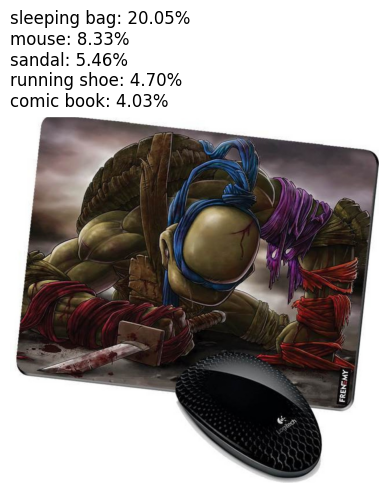

In [120]:
# Effectuer la prédiction
model.eval()  # Mode évaluation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img_tensor = img_tensor.to(device)  # Déplacer le tenseur d'entrée sur le même appareil que le modèle
model = model.to(device)  # S'assurer que le modèle est sur le même appareil que l'image

with torch.no_grad():
    output = model(img_tensor)

# Afficher les 5 classes les plus probables
_, indices = torch.topk(output, 5)
probas = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Afficher l'Image
plt.imshow(img)
plt.axis('off')
# Afficher les classes prédites en légende de l'image matplotlib
plt.text(0, -20, '\n'.join([f'{class_names[idx]}: {probas[idx]:.2f}%' for idx in indices[0]]), color='black', fontsize=12, backgroundcolor='white')
plt.show()



### VGG16 réentrainé

#### Import et transformation des images

In [121]:
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, labels_df, transform=None, augmentations_per_image=5, seed=None):
        self.image_dir = image_dir
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
        self.labels_df = labels_df
        self.transform = transform
        self.augmentations_per_image = augmentations_per_image
        self.seed = seed
        
        if self.seed is not None:
            random.seed(self.seed)
            torch.manual_seed(self.seed)

    def __len__(self):
        return len(self.image_files) * (self.augmentations_per_image + 1)

    def __getitem__(self, idx):
        img_idx = idx // (self.augmentations_per_image + 1)
        img_name = os.path.join(self.image_dir, self.image_files[img_idx])
        image = Image.open(img_name).convert('RGB')

        label = self.labels_df.loc[self.labels_df['uniq_id'] == os.path.splitext(self.image_files[img_idx])[0], 'simple_product_category_tree'].values[0]

        if idx % (self.augmentations_per_image + 1) == 0:
            return self.transform(image), label
        else:
            if self.seed is not None:
                random.seed(self.seed + idx)  # Utiliser une graine unique pour chaque augmentation
            augmented_image = self.transform(image)
            return augmented_image, label

def get_transform(seed=None):
    if seed is not None:
        torch.manual_seed(seed)
    return transforms.Compose([
        transforms.Resize((224, 224)) if seed is None else transforms.RandomResizedCrop(
    size=(224,224),
    scale=(0.08, 1.0),
    ratio=(3/4, 4/3),
    interpolation=transforms.InterpolationMode.BILINEAR
),
        transforms.RandomRotation(40),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [122]:
image_directory = "./Data/Images/"

# Créez un DataFrame avec les noms de fichiers et leurs catégories associées
labels_df = corpus_ajuste[['uniq_id', 'simple_product_category_tree']]

transform = get_transform(graine)

dataset = CustomImageDataset(
    image_directory, 
    labels_df, 
    transform=transform, 
    augmentations_per_image=10, 
    seed=graine
    )

# Dataset alternatif sans augmentations
dataset_no_aug = CustomImageDataset(
    image_directory, 
    labels_df, 
    transform=transform, 
    augmentations_per_image=0, 
    seed=graine
    )

# Créer un DataLoader pour le jeu de données

dataloader = DataLoader(
    dataset, 
    batch_size=32, 
    shuffle=True, 
    worker_init_fn=lambda worker_id: np.random.seed(graine + worker_id)
    )

# Créer un DataLoader pour le jeu de données sans augmentations

dataloader_no_aug = DataLoader(
    dataset_no_aug, 
    batch_size=32, 
    shuffle=True, 
    worker_init_fn=lambda worker_id: np.random.seed(graine + worker_id)
    )

# Boucle pour charger les images et labels (images augmentées incluses)
X_final = []
y_final = []

for images, labels in dataloader:
    X_final.append(images.cpu().numpy())
    y_final.extend(labels)

# Convertir les listes en numpy arrays
X_final = np.vstack(X_final)
y_final = np.array(y_final)

# Vérification des dimensions des images et des labels
print(f'Dimensions des images: {X_final.shape}')
print(f'Dimensions des labels: {y_final.shape}')

# Boucle pour charger les images et labels (sans augmentations)
X_no_aug = []
y_no_aug = []

for images, labels in dataloader_no_aug:
    X_no_aug.append(images.cpu().numpy())
    y_no_aug.extend(labels)

# Convertir les listes en numpy arrays
X_no_aug = np.vstack(X_no_aug)
y_no_aug = np.array(y_no_aug)

# Vérification des dimensions des images et des labels
print(f'Dimensions des images: {X_no_aug.shape}')
print(f'Dimensions des labels: {y_no_aug.shape}')

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning:

Image size (89641545 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



Dimensions des images: (11550, 3, 224, 224)
Dimensions des labels: (11550,)
Dimensions des images: (1050, 3, 224, 224)
Dimensions des labels: (1050,)


#### Préparation des données pour le modèle

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=graine, stratify=y_final)

# Préparer les données
# Encode string labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Réorganiser les dimensions (batch, channels, height, width)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Créer des DataLoader pour l'entraînement et la validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [124]:
# Split train test pour les données sans augmentations
X_train_no_aug, X_test_no_aug, y_train_no_aug, y_test_no_aug = train_test_split(X_no_aug, y_no_aug, test_size=0.2, random_state=graine, stratify=y_no_aug)

# Préparer les données
# Encode string labels into integers
label_encoder = LabelEncoder()
y_train_encoded_no_aug = label_encoder.fit_transform(y_train_no_aug)
y_test_encoded_no_aug = label_encoder.transform(y_test_no_aug)

# Convertir les données en tenseurs PyTorch
X_train_tensor_no_aug = torch.tensor(X_train_no_aug, dtype=torch.float32)  # Réorganiser les dimensions (batch, channels, height, width)
X_test_tensor_no_aug = torch.tensor(X_test_no_aug, dtype=torch.float32)
y_train_tensor_no_aug = torch.tensor(y_train_encoded_no_aug, dtype=torch.long)
y_test_tensor_no_aug = torch.tensor(y_test_encoded_no_aug, dtype=torch.long)

# Créer des DataLoader pour l'entraînement et la validation
train_dataset_no_aug = TensorDataset(X_train_tensor_no_aug, y_train_tensor_no_aug)
test_dataset_no_aug = TensorDataset(X_test_tensor_no_aug, y_test_tensor_no_aug)

train_loader_no_aug = DataLoader(train_dataset_no_aug, batch_size=32, shuffle=True)
test_loader_no_aug = DataLoader(test_dataset_no_aug, batch_size=32)

#### Modélisation

##### Création du framework pour le modèle

###### Fonction pour la création du modèle

In [125]:
# Fonction pour créer le modèle VGG-16 avec option de geler certaines couches
def create_vgg16_model(num_classes=7, dropout=0.1, train_last_n_layers=3):
    model = models.vgg16(pretrained=True)
    model.classifier[5] = nn.Dropout(dropout)
    model.classifier[6] = nn.Linear(4096, num_classes)
    
    for param in model.parameters():
        param.requires_grad = False
    
    for param in list(model.parameters())[-train_last_n_layers:]:
        param.requires_grad = True
    
    return model


###### Fonction pour l'entrainement du modèle

In [126]:
# Fonction d'entraînement améliorée avec diagnostics
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=5, device='cuda'):
    # Première partie de la fonction d'entraînement : définir les listes pour les diagnostics
    model.to(device)
    losses = []
    accuracies = []
    val_losses = []
    val_accuracies = []

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

# Deuxième partie de la fonction d'entraînement : boucle d'entraînement et de validation
    # Boucle sur les époques
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        # Boucle sur les données d'entraînement
        for images, labels in train_loader:
            # Déplacer les données sur l'appareil spécifié
            images, labels = images.to(device), labels.to(device)
            # Remettre à zéro les gradients
            optimizer.zero_grad()
            # Prédiction
            outputs = model(images)
            # Calcul de la perte
            loss = criterion(outputs, labels)
            # Rétropropagation
            loss.backward()
            # Mise à jour des poids
            optimizer.step()
            # Calcul des statistiques
            running_loss += loss.item()
            # Prédiction
            _, predicted = torch.max(outputs, 1)
            # Calcul de la précision
            total += labels.size(0)
            # Calcul du nombre de prédictions correctes
            correct += (predicted == labels).sum().item()
            # Stocker les prédictions et les labels
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        # Calculer la pert et la précision de l'époque
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        # Afficher les diagnostics
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.2f}%')

        # Partie de validation
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        # Désactiver le calcul des gradients
        with torch.no_grad():
            # Boucle sur les données de validation
            for val_images, val_labels in val_loader:
                # Déplacer les données sur l'appareil spécifié
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                # Prédiction
                val_outputs = model(val_images)
                # Calcul de la perte
                val_loss = criterion(val_outputs, val_labels)

                # Calcul des statistiques
                val_running_loss += val_loss.item()
                _, val_predicted = torch.max(val_outputs, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()
        # Calcul de la perte et de la précision de l'époque
        val_epoch_loss = val_running_loss / len(val_loader)
        val_epoch_acc = 100 * val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        # Afficher les diagnostics de validation
        print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.2f}%')

        # Early stopping
        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()  # Sauvegarder le meilleur modèle
        else:
            epochs_no_improve += 1
        # Arrêter si la perte de validation n'a pas diminué depuis 'patience' époques
        if epochs_no_improve >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            model.load_state_dict(best_model_state)  # Recharger le meilleur modèle
            break

    # Tracer les courbes de perte et de précision
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Évolution de la perte')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.title('Évolution de la précision')
    plt.xlabel('Époques')
    plt.ylabel('Précision (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model


In [127]:

# Fonction d'évaluation du modèle
def evaluate_model(model, test_loader, device='cuda'):
    """
    Évalue un modèle PyTorch sur les données de test.

    Args:
        model (nn.Module): Modèle PyTorch à évaluer.
        test_loader (DataLoader): DataLoader pour les données de test.
        device (str): Appareil utilisé (par défaut 'cuda').

    Returns:
        test_acc (float): Précision du modèle sur les données de test.
    """
    # Déplacer le modèle sur l'appareil spécifié
    model.to(device)
    model.eval()
    correct = 0
    total = 0

    # Évaluation sans calcul des gradients
    with torch.no_grad():
        # Boucle sur les données de test
        for images, labels in test_loader:
            # Déplacer les données sur l'appareil spécifié
            images, labels = images.to(device), labels.to(device)
            # Prédiction
            outputs = model(images)
            # Calcul de la précision
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    # Affichage de la précision
    test_acc = 100 * correct / total
    print(f'Test Accuracy: {test_acc:.2f}%')
    return test_acc

# Fonction pour extraire les features du VGG-16 pré-entraîné pour un classifieur random forest


In [128]:
def extract_features_vgg16(model: torch.nn.Module, dataloader: DataLoader) -> tuple[torch.Tensor, torch.Tensor]:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device).eval()

    print(f"Calculations will be performed on: {device.type.upper()}")

    features_list = []
    labels_list = []

    with torch.no_grad(), torch.cuda.amp.autocast():
        for images, labels in tqdm(dataloader, desc="Extracting features"):
            images = images.to(device)
            features = model(images)
            features_list.append(features.cpu())
            labels_list.append(labels)

    features = torch.cat(features_list, dim=0)
    labels = torch.cat(labels_list, dim=0)

    return features, labels

##### VGG16 + Classifieur ML

In [129]:
# Information sur le train_loader
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [130]:
# Définition du modèle VGG-16 sans réentraînement d'aucune couche et sans couche de classification
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.vgg16(pretrained=True).to(device)
model.classifier = nn.Identity() # Supprimer la couche de classification pour obtenir les features

# Récupération des features pour toutes les images en train et en test
X_train_features, y_train_features = extract_features_vgg16(model, train_loader)
X_test_features, y_test_features = extract_features_vgg16(model, test_loader)


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.

C:\Users\kepha\AppData\Local\Temp\ipykernel_28480\1370550563.py:10: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Calculations will be performed on: CUDA


Extracting features: 100%|██████████| 289/289 [00:34<00:00,  8.30it/s]


Calculations will be performed on: CUDA


Extracting features: 100%|██████████| 73/73 [00:06<00:00, 10.79it/s]


In [131]:
# Afficher les jeux de train et de test
print(f'Dimensions des features d\'entraînement: {X_train_features.shape}')
print(f'Dimensions des labels d\'entraînement: {len(y_train_features)}')
print(f'Dimensions des features de test: {X_test_features.shape}')
print(f'Dimensions des labels de test: {len(y_test_features)}')

Dimensions des features d'entraînement: torch.Size([9240, 25088])
Dimensions des labels d'entraînement: 9240
Dimensions des features de test: torch.Size([2310, 25088])
Dimensions des labels de test: 2310


###### Kmeans

In [133]:
# UMAP pour garder 10 dimensions
umap_reducer = umap.UMAP(n_components=100, random_state=graine)

# Réduire la dimensionnalité des features avec UMAP
X_train_umap = umap_reducer.fit_transform(X_train_features)
X_test_umap = umap_reducer.transform(X_test_features)

# Concaténation des features et des labels réduits
X_train_umap = pd.DataFrame(X_train_umap)
X_test_umap = pd.DataFrame(X_test_umap)
X = pd.concat([X_train_umap, X_test_umap])

y = torch.cat((y_train_features, y_test_features), dim=0).tolist()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [134]:
# Objet kmeans à 7 clusters
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto')

In [135]:
# Fit_transform sur les features
X['classif_non_supervisee'] = kmeans.fit_predict(X)

# Calcul de l'ARI
adjusted_rand_score(y, X['classif_non_supervisee'])

0.009311953991214733

In [137]:
# Convert X_train_features to DataFrame
X_train_df = pd.DataFrame(X_train_features)
X_test_df = pd.DataFrame(X_test_features)

# Fit transform kmeans sur les features sans réduction de dimensionnalité
X_train_df['classif_non_supervisee'] = kmeans.fit_predict(X_train_features)
X_test_df['classif_non_supervisee'] = kmeans.predict(X_test_features)

# Concatenate y_train_features and y_test_features
y_combined = torch.cat((y_train_features, y_test_features), dim=0).tolist()

# Calcul de l'ARI
adjusted_rand_score(y_combined, X_train_df['classif_non_supervisee'].tolist() + X_test_df['classif_non_supervisee'].tolist())


0.02234890868898447

###### XGB

In [138]:
from xgboost import XGBClassifier

#Créer un classifieur XGBoost
xgb = XGBClassifier(objective='multi:softmax', random_state=graine, n_jobs=-1)

#Définir les paramètres à tester
param_dist = {
    'n_estimators': randint(10, 200),  # Nombre d'arbres à tester
    'max_depth': randint(3, 10),  # Profondeur maximale des arbres
    'learning_rate': uniform(0.01, 0.1),  # Taux d'apprentissage
    'gamma': uniform(0.1, 0.5),  # Réduction minimale de la fonction de coût
    'reg_alpha': uniform(0.2, 0.5),  # Terme de régularisation L1
    'reg_lambda': uniform(0.2, 0.5),  # Terme de régularisation L2
    'min_child_weight': randint(5, 10)  # Poids minimum des enfants
}

#Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=graine,
    scoring='accuracy'
)

# Early stopping rounds
xgb.set_params(early_stopping_rounds=10)

#Entraîner RandomizedSearchCV
random_search.fit(X_train_umap, y_train_features, eval_set=[(X_test_umap, y_test_features)], verbose=10)

#Meilleurs paramètres et score
print("Meilleurs paramètres trouvés : ", random_search.best_params_)
print("Meilleur score de validation croisée : ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


1 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\xgboost

[0]	validation_0-mlogloss:1.92561
[10]	validation_0-mlogloss:1.82066
[20]	validation_0-mlogloss:1.78533
[30]	validation_0-mlogloss:1.77621
[40]	validation_0-mlogloss:1.77865
Meilleurs paramètres trouvés :  {'gamma': 0.23640522291246238, 'learning_rate': 0.063385419801741, 'max_depth': 9, 'min_child_weight': 6, 'n_estimators': 170, 'reg_alpha': 0.6577468702287301, 'reg_lambda': 0.4131311651918151}
Meilleur score de validation croisée :  0.35054112554112554


In [139]:
# Résultats sur l'ensemble de test
best_xgb = random_search.best_estimator_

# Afficher les résultats sur l'ensemble de test
print("Accuracy (test):", accuracy_score(y_test_features, best_xgb.predict(X_test_umap)))

# Afficher les résultats sur l'ensemble d'entraînement

print("Accuracy (train):", accuracy_score(y_train_features, best_xgb.predict(X_train_umap)))

Accuracy (test): 0.3008658008658009
Accuracy (train): 0.7044372294372294


##### VGG16, dernière couche réentrainée

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.



Epoch [1/30], Loss: 1.9964, Train Accuracy: 15.03%
Validation Loss: 1.9713, Validation Accuracy: 14.16%
Epoch [2/30], Loss: 1.9930, Train Accuracy: 14.50%
Validation Loss: 1.9692, Validation Accuracy: 16.32%
Epoch [3/30], Loss: 1.9924, Train Accuracy: 14.02%
Validation Loss: 1.9695, Validation Accuracy: 16.58%
Epoch [4/30], Loss: 1.9917, Train Accuracy: 14.86%
Validation Loss: 1.9700, Validation Accuracy: 15.93%
Epoch [5/30], Loss: 1.9944, Train Accuracy: 14.91%
Validation Loss: 1.9695, Validation Accuracy: 16.97%
Epoch [6/30], Loss: 1.9945, Train Accuracy: 14.90%
Validation Loss: 1.9704, Validation Accuracy: 17.19%
Epoch [7/30], Loss: 1.9933, Train Accuracy: 14.51%
Validation Loss: 1.9703, Validation Accuracy: 15.41%
Early stopping triggered at epoch 7


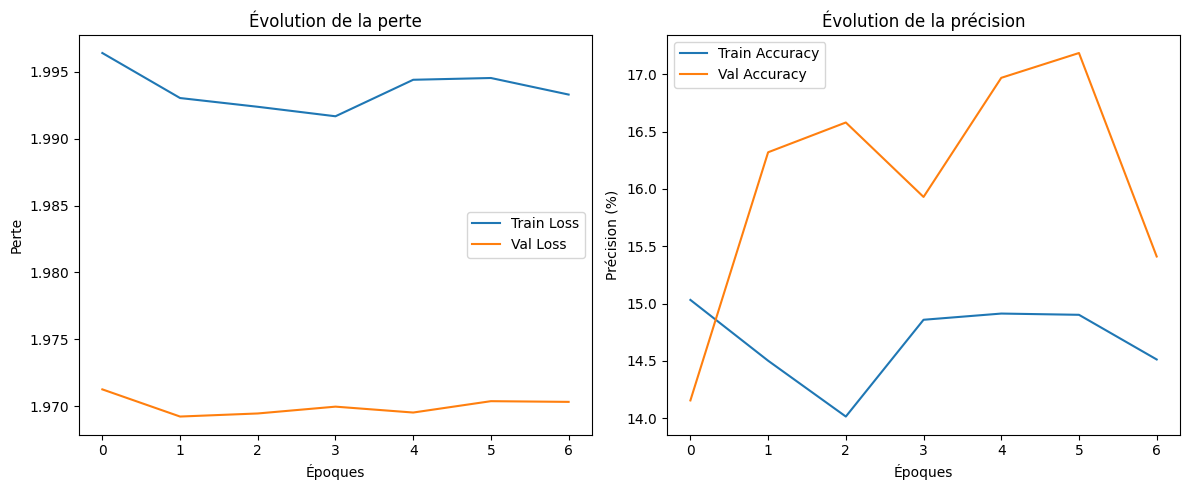

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [140]:
# Créer le modèle VGG-16 avec une couche entraînable
model = create_vgg16_model(num_classes=7, train_last_n_layers=1)

# Entraîner le modèle
train_model(
    model = model,
    train_loader = train_loader,
    val_loader = test_loader,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01),
    num_epochs = 30,
    patience = 5,
    device = 'cuda'
)

In [141]:
# Évaluer le modèle
evaluate_model(model, test_loader)

Test Accuracy: 15.41%


15.41125541125541

In [142]:
# Afficher l'accuracy sur l'ensemble d'entraînement
evaluate_model(model, train_loader)

Test Accuracy: 14.25%


14.253246753246753

Epoch [1/30], Loss: 1.9592, Train Accuracy: 15.36%
Validation Loss: 1.9475, Validation Accuracy: 15.71%
Epoch [2/30], Loss: 1.9621, Train Accuracy: 14.76%
Validation Loss: 1.9475, Validation Accuracy: 15.71%
Epoch [3/30], Loss: 1.9609, Train Accuracy: 14.17%
Validation Loss: 1.9475, Validation Accuracy: 15.71%
Epoch [4/30], Loss: 1.9539, Train Accuracy: 15.60%
Validation Loss: 1.9475, Validation Accuracy: 15.71%
Epoch [5/30], Loss: 1.9570, Train Accuracy: 16.55%
Validation Loss: 1.9475, Validation Accuracy: 15.71%
Epoch [6/30], Loss: 1.9637, Train Accuracy: 14.88%
Validation Loss: 1.9475, Validation Accuracy: 15.71%
Early stopping triggered at epoch 6


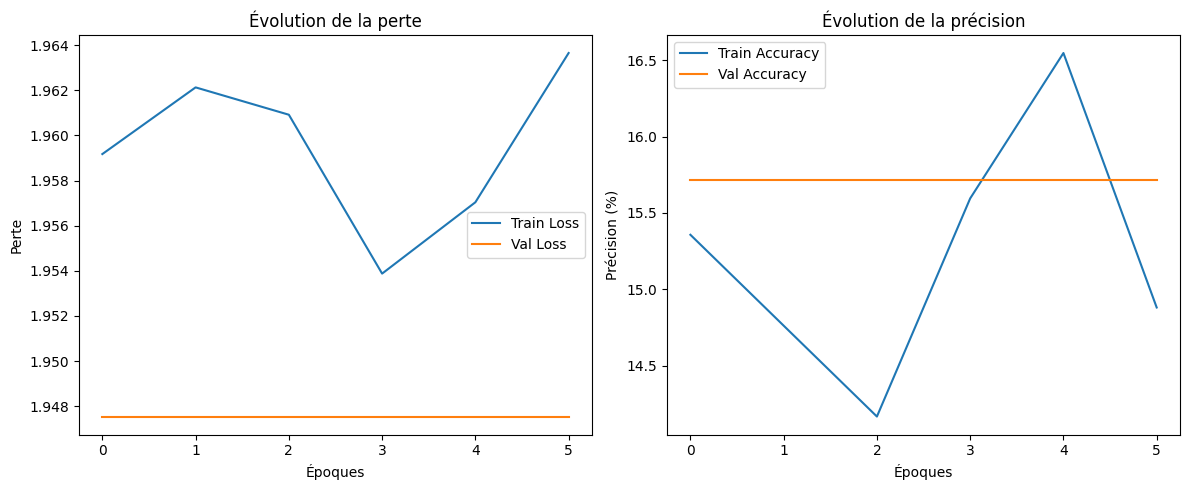

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [143]:
model_2 = create_vgg16_model(num_classes=7, train_last_n_layers=1)

# Définir la fonction de perte et l'optimiseur, utiliser les données sans augmentations
train_model(
    model = model_2,
    train_loader = train_loader_no_aug,
    val_loader = test_loader_no_aug,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01),
    num_epochs = 30,
    patience = 5,
    device = 'cuda'
)

In [144]:
# Évaluer le modèle
evaluate_model(model_2, test_loader)

Test Accuracy: 16.97%


16.96969696969697

In [145]:
# Afficher l'accuracy sur l'ensemble d'entraînement
evaluate_model(model_2, train_loader)

Test Accuracy: 16.58%


16.58008658008658

##### VGG16, trois dernières couches réentrainées

Epoch [1/30], Loss: 0.9966, Train Accuracy: 65.80%
Validation Loss: 0.8043, Validation Accuracy: 72.38%
Epoch [2/30], Loss: 0.7868, Train Accuracy: 72.59%
Validation Loss: 0.7770, Validation Accuracy: 73.25%
Epoch [3/30], Loss: 0.7067, Train Accuracy: 75.69%
Validation Loss: 0.7503, Validation Accuracy: 73.33%
Epoch [4/30], Loss: 0.6593, Train Accuracy: 77.07%
Validation Loss: 0.6998, Validation Accuracy: 74.98%
Epoch [5/30], Loss: 0.6173, Train Accuracy: 77.93%
Validation Loss: 0.6838, Validation Accuracy: 76.02%
Epoch [6/30], Loss: 0.5975, Train Accuracy: 78.99%
Validation Loss: 0.6497, Validation Accuracy: 76.41%
Epoch [7/30], Loss: 0.5759, Train Accuracy: 79.85%
Validation Loss: 0.6628, Validation Accuracy: 76.75%
Epoch [8/30], Loss: 0.5517, Train Accuracy: 80.79%
Validation Loss: 0.6206, Validation Accuracy: 78.44%
Epoch [9/30], Loss: 0.5477, Train Accuracy: 80.39%
Validation Loss: 0.6950, Validation Accuracy: 75.89%
Epoch [10/30], Loss: 0.5301, Train Accuracy: 81.15%
Validation L

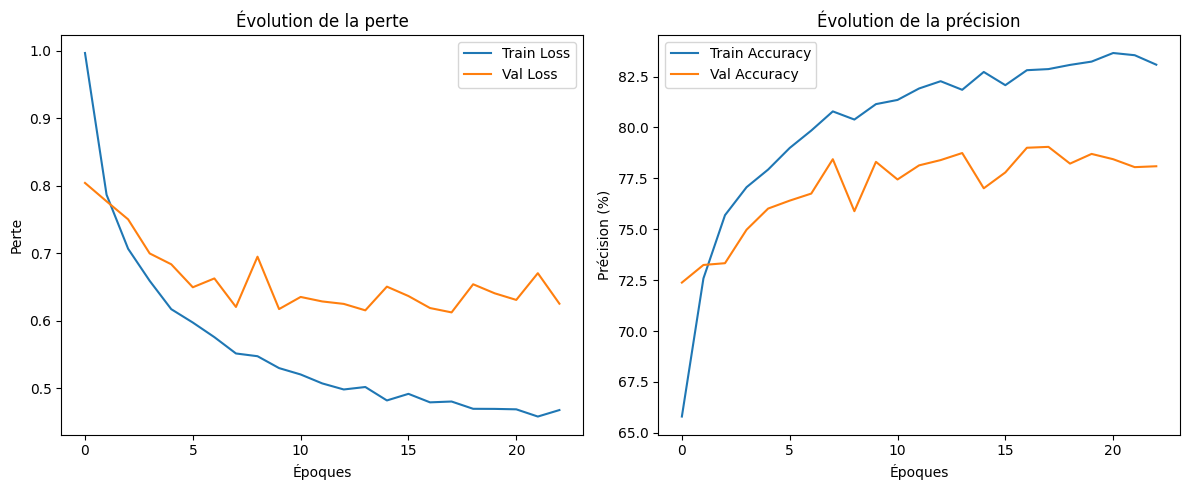

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [146]:
model = create_vgg16_model(num_classes=7, train_last_n_layers=3)

# Définir la fonction de perte et l'optimiseur
train_model(
    model = model,
    train_loader = train_loader,
    val_loader = test_loader,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001),
    num_epochs = 30,
    patience = 5,
    device = 'cuda'
)

In [147]:
# Évaluer le modèle
evaluate_model(model, test_loader)

Test Accuracy: 78.10%


78.0952380952381

In [148]:
# Afficher l'accuracy sur l'ensemble d'entraînement
evaluate_model(model, train_loader)

Test Accuracy: 93.12%


93.11688311688312

Epoch [1/30], Loss: 1.9909, Train Accuracy: 13.93%
Validation Loss: 1.9979, Validation Accuracy: 14.29%
Epoch [2/30], Loss: 1.9950, Train Accuracy: 12.50%
Validation Loss: 1.9979, Validation Accuracy: 14.29%
Epoch [3/30], Loss: 1.9899, Train Accuracy: 14.52%
Validation Loss: 1.9979, Validation Accuracy: 14.29%
Epoch [4/30], Loss: 1.9814, Train Accuracy: 15.12%
Validation Loss: 1.9979, Validation Accuracy: 14.29%
Epoch [5/30], Loss: 2.0101, Train Accuracy: 15.00%
Validation Loss: 1.9979, Validation Accuracy: 14.29%
Epoch [6/30], Loss: 1.9965, Train Accuracy: 14.05%
Validation Loss: 1.9979, Validation Accuracy: 14.29%
Early stopping triggered at epoch 6


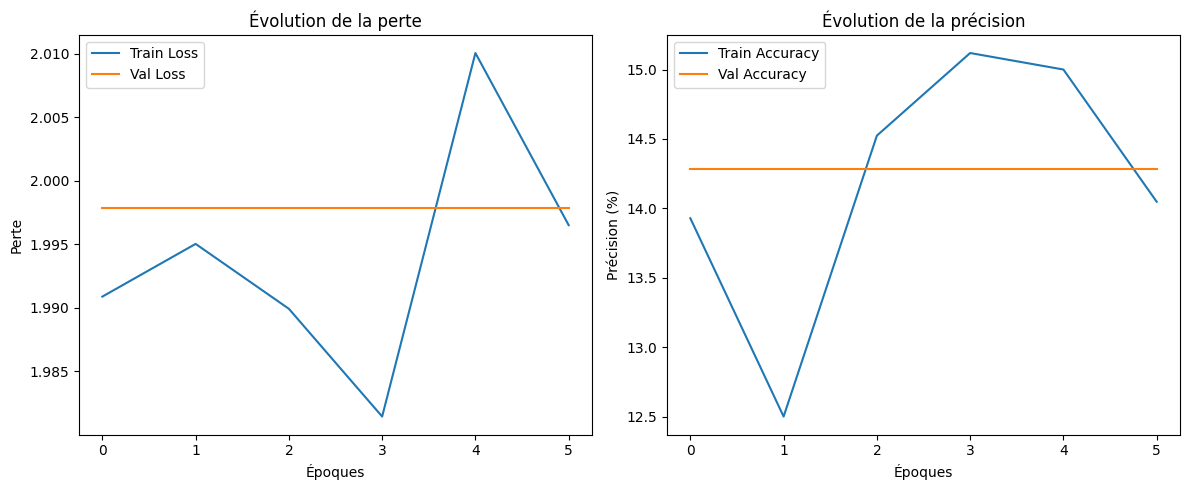

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [149]:
model_2 = create_vgg16_model(num_classes=7, train_last_n_layers=3)

# Définir la fonction de perte et l'optimiseur, utiliser les données sans augmentations
train_model(
    model = model_2,
    train_loader = train_loader_no_aug,
    val_loader = test_loader_no_aug,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001),
    num_epochs = 30,
    patience = 5,
    device = 'cuda'
)

In [150]:
# Évaluer le modèle
evaluate_model(model_2, test_loader)

Test Accuracy: 13.51%


13.506493506493506

In [151]:
# Afficher l'accuracy sur l'ensemble d'entraînement
evaluate_model(model_2, train_loader)

Test Accuracy: 13.97%


13.971861471861471

#### Quelque résultats issus du meilleur modèle

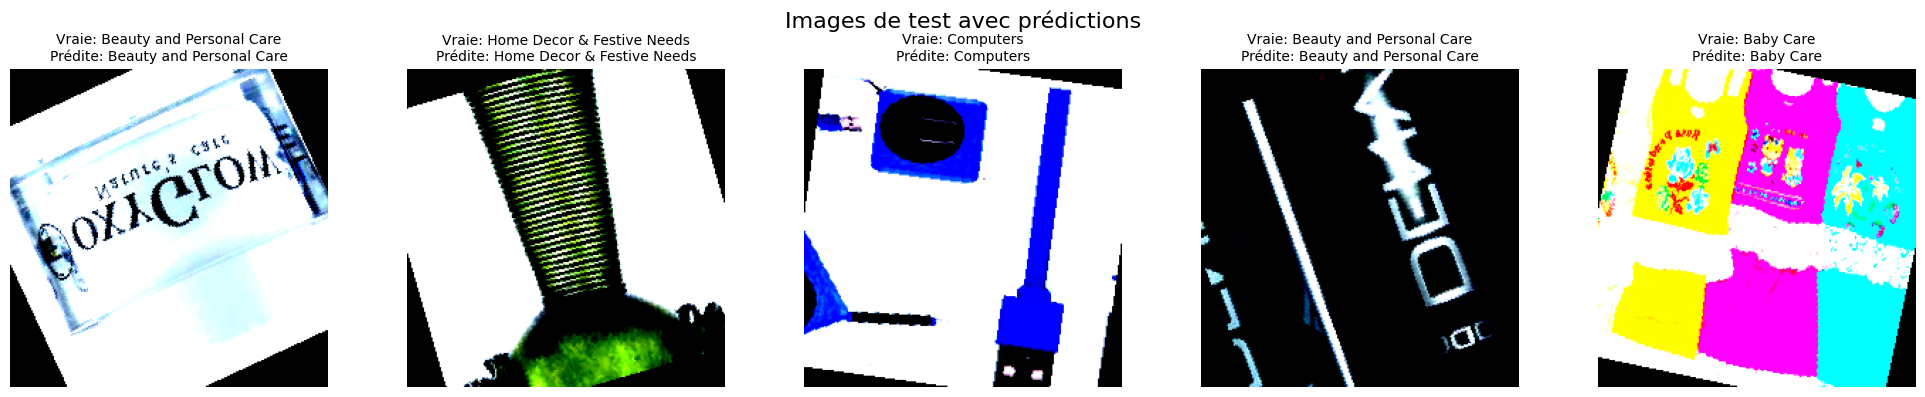


Résumé des prédictions:
Image 1 - Vraie classe: Computers, Classe prédite: Computers
Image 2 - Vraie classe: Kitchen & Dining, Classe prédite: Kitchen & Dining
Image 3 - Vraie classe: Baby Care, Classe prédite: Baby Care
Image 4 - Vraie classe: Kitchen & Dining, Classe prédite: Kitchen & Dining
Image 5 - Vraie classe: Computers, Classe prédite: Computers


In [152]:
# Charger 5 images du jeu de test
images, labels = next(iter(test_loader))

# Préparer une figure pour afficher les 5 images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle("Images de test avec prédictions", fontsize=16)

for i in range(5):
    # Choisir un index aléatoire
    random_index = random.randint(0, images.shape[0] - 1)
    
    # Sélectionner une image aléatoire et son étiquette correspondante
    random_image = images[random_index].cpu().numpy().transpose((1, 2, 0))
    random_label = labels[random_index].item()
    
    # Afficher l'image
    axes[i].imshow(random_image)
    axes[i].axis('off')
    
    # Préparer l'image pour le modèle
    input_image = torch.tensor(random_image, dtype=torch.float32).unsqueeze(0).permute(0, 3, 1, 2).to(device)
    
    # Prédire la classe de l'image
    model.eval()
    with torch.no_grad():
        output = model(input_image)
        _, predicted = torch.max(output, 1)
    
    # Afficher la prédiction sous l'image
    true_class = label_encoder.classes_[random_label]
    pred_class = label_encoder.classes_[predicted.item()]
    axes[i].set_title(f'Vraie: {true_class}\nPrédite: {pred_class}', fontsize=10)

plt.tight_layout()
plt.show()

# Afficher un résumé des prédictions
print("\nRésumé des prédictions:")
for i in range(5):
    true_class = label_encoder.classes_[labels[i].item()]
    input_image = images[i].unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_image)
        _, predicted = torch.max(output, 1)
    pred_class = label_encoder.classes_[predicted.item()]
    print(f'Image {i+1} - Vraie classe: {true_class}, Classe prédite: {pred_class}')

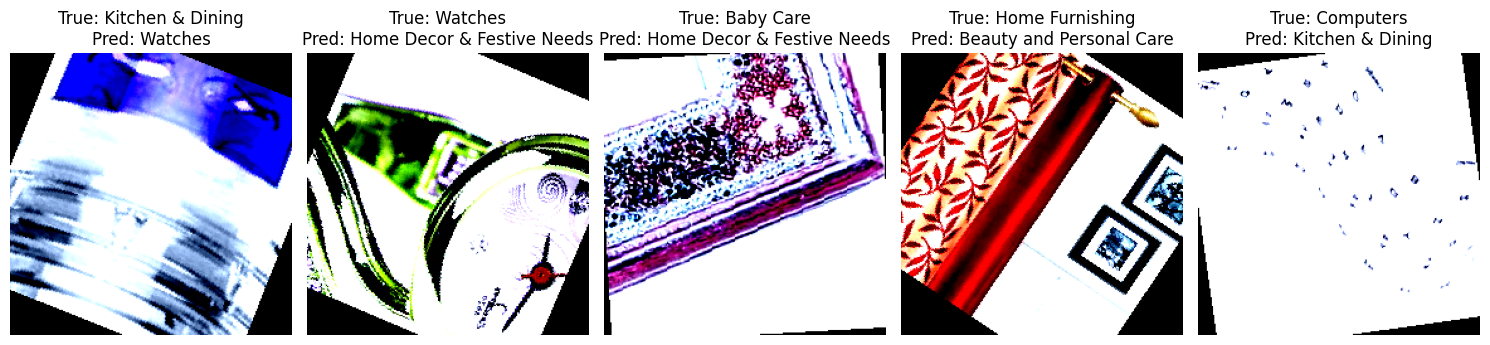

In [ ]:
# Mode évaluation
model.eval()

misclassified_images = []
misclassified_labels = []
misclassified_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Trouver les indices des images mal classées
        misclassified_idx = (predicted != labels).nonzero()[:, 0]
        
        # Ajouter les images mal classées à nos listes
        misclassified_images.extend(images[misclassified_idx].cpu())
        misclassified_labels.extend(labels[misclassified_idx].cpu())
        misclassified_preds.extend(predicted[misclassified_idx].cpu())
        
        if len(misclassified_images) >= 5:
            break

# Convertir les listes en tenseurs
misclassified_images = torch.stack(misclassified_images)
misclassified_labels = torch.stack(misclassified_labels)
misclassified_preds = torch.stack(misclassified_preds)

# Choisir 5 exemples aléatoires
num_examples = min(5, len(misclassified_images))
random_indices = np.random.choice(len(misclassified_images), num_examples, replace=False)

# Afficher les images mal classées
plt.figure(figsize=(15, 3*num_examples))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_examples, i+1)
    image = misclassified_images[idx].cpu().numpy().transpose((1, 2, 0))
    # Dénormaliser l'image si nécessaire
    # image = (image * std) + mean
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'True: {label_encoder.classes_[misclassified_labels[idx]]}\nPred: {label_encoder.classes_[misclassified_preds[idx]]}')

plt.tight_layout()
plt.show()